In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import matplotlib
import os

In [2]:
import importlib
import euler_utils
import plotting_utils
import predictions_evaluations
import utils
import idf_plotting

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [3]:
importlib.reload(euler_utils)
importlib.reload(plotting_utils)
importlib.reload(predictions_evaluations)
importlib.reload(utils)
importlib.reload(idf_plotting)

<module 'idf_plotting' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/idf_plotting.py'>

In [4]:
scratch_folder = '/cluster/scratch/mfrancesc/IVT/SA_scenario/'
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'
last_iter = 60
methods = ['markov','msa02','mw5']

# Read outputs

## With rejections

In [5]:
data_markov_rebalancing = {}
data_markov_no_rebalancing = {}

In [6]:
fleet_sizes = list(range(200, 2001,200))
for f in fleet_sizes:
    data_markov_rebalancing[f] = euler_utils.read_output(
        os.path.join(work_folder,"idf","markov_fleetSize/", str(f)),
        last_iter=last_iter
    )
    
    data_markov_no_rebalancing[f] = euler_utils.read_output(
        os.path.join(work_folder,"idf","markov_fleetSize_no_rebalancing/", str(f)),
        last_iter=last_iter
    )

100%|██████████| 61/61 [00:42<00:00,  1.43it/s]


In [7]:
data_list_markov_rebalancing = [
    (str(k) + ' veh rebalancing', v, last_iter) for k,v in data_markov_rebalancing.items()
]
data_list_markov_no_rebalancing = [
    (str(k) + ' veh no reb', v, last_iter) for k,v in data_markov_no_rebalancing.items()
]

data_list_markov = [
    item for pair in zip(data_list_markov_rebalancing, data_list_markov_no_rebalancing) 
    for item in pair]

In [8]:
display(plotting_utils.get_multiple_stats_table(data_list_markov))

200 veh rebalancing (it.60)  \
Number of rides                                                       17957   
Wait time (min)                   Mean                              5.81153   
                                  Median                               5.95   
                                  Std                               2.81119   
                                  75-percentile                     8.28333   
                                  99-percentile                       10.25   
                                  Max                               24.5667   
Travel time (min)                 Mean                               12.852   
                                  Median                            10.9667   
                                  Std                                 9.872   
                                  75-percentile                       17.55   
                                  99-percentile                     42.7147   
                                  Max                               141.583   
Mean direct distance (km)                                            2.9414   
Average detour factor (time wise)                                   1.34751   
Total execution time                                        0 days 14:21:48   

                                                200 veh no reb (it.60)  \
Number of rides                                                  17747   
Wait time (min)                   Mean                         5.91238   
                                  Median                       6.13333   
                                  Std                          2.75931   
                                  75-percentile                    8.3   
                                  99-percentile                   10.2   
                                  Max                          24.5333   
Travel time (min)                 Mean                         12.9113   
                                  Median                       10.9833   
                                  Std                          9.85757   
                                  75-percentile                17.5667   
                                  99-percentile                42.7603   
                                  Max                            136.9   
Mean direct distance (km)                                      2.95335   
Average detour factor (time wise)                              1.34154   
Total execution time                                   0 days 19:17:22   

                                                400 veh rebalancing (it.60)  \
Number of rides                                                       34988   
Wait time (min)                   Mean                              5.54452   
                                  Median                            5.68333   
                                  Std                               2.82158   
                                  75-percentile                     7.88333   
                                  99-percentile                     10.2167   
                                  Max                               25.8167   
Travel time (min)                 Mean                              12.3452   
                                  Median                            10.4667   
                                  Std                               9.44178   
                                  75-percentile                     16.8333   
                                  99-percentile                     41.1167   
                                  Max                               160.017   
Mean direct distance (km)                                           2.70995   
Average detour factor (time wise)                                   1.36474   
Total execution time                                        0 days 18:46:41   

                                                400 veh no reb (it.60)  \
Number of rides            

In [9]:
data_dynamic_CN = {}

In [10]:
k_values = [10,25,50,100]
for m in methods:
    data_dynamic_CN[m] = {}
    for k in k_values:
        data_dynamic_CN[m][k] = euler_utils.read_output(
            os.path.join(work_folder,"idf","dynamic_CN", m, "k"+str(k)),
            last_iter=last_iter
        )

100%|██████████| 61/61 [00:48<00:00,  1.26it/s]


In [11]:
data_square_850 = {}

In [12]:
for m in methods:
    data_square_850[m] = euler_utils.read_output(
        os.path.join(work_folder,"idf","square_850", m),
        last_iter=last_iter
    )

100%|██████████| 61/61 [00:41<00:00,  1.48it/s]


In [13]:
data_hex_500 = {}

In [14]:
for method in methods:
    data_hex_500[method] = euler_utils.read_output(
        os.path.join(work_folder,"idf","fleetSize_1000",method),
        last_iter=last_iter
    )

100%|██████████| 61/61 [00:44<00:00,  1.37it/s]


In [15]:
data_fixed = euler_utils.read_output(
    os.path.join(scratch_folder,"idf","fixed","1000"),
    last_iter=last_iter
)

100%|██████████| 61/61 [00:14<00:00,  4.31it/s]


In [16]:
data_global = {}

In [17]:
for m in methods:
    data_global[m] = euler_utils.read_output(
        os.path.join(scratch_folder,"idf","global","1000",m),
        last_iter=last_iter
    )

100%|██████████| 61/61 [00:14<00:00,  4.20it/s]


In [50]:
data_with_rej = {}
data_with_rej['markov_rebalancing'] = data_markov_rebalancing
data_with_rej['markov_no_rebalancing'] = data_markov_no_rebalancing
data_with_rej['dynamic_CN'] = data_dynamic_CN
data_with_rej['square_850'] = data_square_850
data_with_rej['hex_500'] = data_hex_500
data_with_rej['fixed'] = data_fixed
data_with_rej['global'] = data_global

## Without rejections

In [13]:
data_no_rej

NameError: name 'data_no_rej' is not defined

In [27]:
no_rej_data_global = {}
for m in methods:
    no_rej_data_global[m] = euler_utils.read_output(
        os.path.join(work_folder,"idf","no_rej","global","1000",m),
        last_iter=last_iter
    )

100%|██████████| 61/61 [00:26<00:00,  2.28it/s]


In [28]:
no_rej_data_fixed = euler_utils.read_output(
    os.path.join(work_folder,"idf","no_rej","fixed","1000"),
    last_iter=last_iter
)

100%|██████████| 61/61 [00:31<00:00,  1.95it/s]


In [29]:
k_values = [10,25,50,100]
no_rej_data_dynamic_CN = {}
for m in methods:
    no_rej_data_dynamic_CN[m] = {}
    for k in k_values:
        no_rej_data_dynamic_CN[m][k] = euler_utils.read_output(
            os.path.join(work_folder,"idf","no_rej","dynamic_CN", m, "k"+str(k)),
            last_iter=last_iter
        )

100%|██████████| 61/61 [00:40<00:00,  1.52it/s]


In [30]:
no_rej_data_square_850 = {}
for m in methods:
    no_rej_data_square_850[m] = euler_utils.read_output(
        os.path.join(work_folder,"idf","no_rej","square_850", m),
        last_iter=last_iter
    )

100%|██████████| 61/61 [00:33<00:00,  1.82it/s]


In [31]:
no_rej_data_hex_500 = {}
for method in methods:
    no_rej_data_hex_500[method] = euler_utils.read_output(
        os.path.join(work_folder,"idf","no_rej","fleetSize_1000",method),
        last_iter=last_iter
    )


100%|██████████| 61/61 [00:32<00:00,  1.86it/s]


In [32]:
no_rej_data_dynamic_FD = {}
for m in ['markov']:
    no_rej_data_dynamic_FD[m] = {}
    for d in [500]:
        no_rej_data_dynamic_FD[m][d] = euler_utils.read_output(
            os.path.join(work_folder,"idf","no_rej","dynamic_FD", m, str(d)),
            last_iter=last_iter
        )

100%|██████████| 61/61 [00:32<00:00,  1.85it/s]


In [33]:
no_rej_data_dynamic_PN = {}
for m in ['markov']:
    no_rej_data_dynamic_PN[m] = {}
    for p in [0.1,0.2,0.3]:
        km = 1000
        no_rej_data_dynamic_PN[m][p] = euler_utils.read_output(
            os.path.join(work_folder,"idf","no_rej","dynamic_PN", m, "p"+str(p) + '_km' + str(km)),
            last_iter=last_iter
        )

100%|██████████| 61/61 [00:33<00:00,  1.84it/s]


In [34]:
data_no_rej = {}
data_no_rej['dynamic_CN'] = no_rej_data_dynamic_CN
data_no_rej['fixed'] = no_rej_data_fixed
data_no_rej['global'] = no_rej_data_global
data_no_rej['square_850'] = no_rej_data_square_850
data_no_rej['hex_500'] = no_rej_data_hex_500
data_no_rej['dynamic_PN'] = no_rej_data_dynamic_PN
data_no_rej['dynamic_FD'] = no_rej_data_dynamic_FD


Compare stats with and without rejections

In [17]:
compare_rej = [
    ("Hex 500 markov rej", data_with_rej['hex_500']['markov'], last_iter),
    ("Hex 500 markov no rej", data_no_rej['hex_500']['markov'], last_iter),
    ("CN=10 markov rej", data_with_rej['dynamic_CN']['markov'][10], last_iter),
    ("CN=10 markov no rej", data_no_rej['dynamic_CN']['markov'][10], last_iter),
    ("CN=25 markov rej", data_with_rej['dynamic_CN']['markov'][25], last_iter),
    ("CN=25 markov no rej", data_no_rej['dynamic_CN']['markov'][25], last_iter),
]

NameError: name 'data_with_rej' is not defined

In [45]:
display(plotting_utils.get_multiple_stats_table(compare_rej))

Hex 500 markov rej (it.60)  \
Number of rides                                                      83033   
Wait time (min)                   Mean                              4.3188   
                                  Median                           4.08333   
                                  Std                              2.64374   
                                  75-percentile                    6.18333   
                                  99-percentile                         10   
                                  Max                                 75.2   
Travel time (min)                 Mean                             11.1637   
                                  Median                           9.06667   
                                  Std                              8.99573   
                                  75-percentile                       15.4   
                                  99-percentile                      39.45   
                                  Max                              282.267   
Mean direct distance (km)                                          2.17679   
Average detour factor (time wise)                                  1.45971   
Total execution time                                       0 days 22:05:13   

                                                Hex 500 markov no rej (it.60)  \
Number of rides                                                         84833   
Wait time (min)                   Mean                                10.7766   
                                  Median                                 6.85   
                                  Std                                 10.0939   
                                  75-percentile                       16.2667   
                                  99-percentile                       38.1167   
                                  Max                                 270.883   
Travel time (min)                 Mean                                10.5071   
                                  Median                                  8.2   
                                  Std                                 8.79426   
                                  75-percentile                       14.3167   
                                  99-percentile                        39.028   
                                  Max                                 254.317   
Mean direct distance (km)                                             2.03709   
Average detour factor (time wise)                                      1.4963   
Total execution time                                          1 days 11:22:02   

                                                CN=10 markov rej (it.60)  \
Number of rides                                                    83339   
Wait time (min)                   Mean                           4.31651   
                                  Median                         4.08333   
                                  Std                            2.62671   
                                  75-percentile                  6.18333   
                                  99-percentile                  9.98333   
                                  Max                            62.8333   
Travel time (min)                 Mean                           11.1222   
                                  Median                            9.05   
                                  Std                            8.87348   
                                  75-percentile                  15.3667   
                                  99-percentile                  38.6667   
                                  Max                              289.9   
Mean direct distance (km)                                        2.17377   
Average detour factor (time wise)                                1.45757   
Total execution time                                     0 days 22:37:33   

                                                CN

Write in the discussion that currently the vehicles are used as much as possible bc rejections are not allowed, what if there are certain trips that affect the waiting time a lot -> we tested with allowing rejections and the number of trips is still the same more or less but the waiting times are much lower.

Introducing rejections into the sytem made the sytem much more efficient but then some agents are stuck, so it begs the question of how many agents would use the system if they know that they can be rejected.

In [25]:
data_no_rej.keys()

dict_keys(['dynamic_CN', 'fixed', 'global', 'hex_500'])

In [40]:
data_no_rej['fixed']['drt_predictions'][last_iter][data_no_rej['fixed']['drt_predictions'][last_iter].waitingTime_min != 10]

personId  tripIndex  startLink  startTime  travelTime_min  \
7      11641078          0        NaN        0.0             0.0   
8      11641078          1        NaN        0.0             0.0   
88     11653238          1        NaN        0.0             0.0   
342    11653415          1        NaN        0.0             0.0   
380    11641539          0        NaN        0.0             0.0   
...         ...        ...        ...        ...             ...   
22178   5788224          2        NaN        0.0             0.0   
22179   5788224          3        NaN        0.0             0.0   
22191   5810561          3        NaN        0.0             0.0   
22192   5810561          4        NaN        0.0             0.0   
22296   5789765          3        NaN        0.0             0.0   

       accessEgressTime_min  cost_MU  waitingTime_min  euclideanDistance_km  \
7                  4.583333      0.0              0.0              0.254471   
8                  4.583333      0.0              0.0              0.254471   
88                 0.000000      0.0              0.0              0.000000   
342                0.000000      0.0              0.0              0.000000   
380                0.000000      0.0              0.0              0.000000   
...                     ...      ...              ...                   ...   
22178              0.000000      0.0              0.0              0.000000   
22179              0.000000      0.0              0.0              0.000000   
22191              0.000000      0.0              0.0              0.000000   
22192              0.000000      0.0              0.0              0.000000   
22296              0.000000      0.0              0.0              0.000000   

       maxTravelTime_min  directRideTime_min  
7                    0.0                 0.0  
8                    0.0                 0.0  
88                   0.0                 0.0  
342                  0.0                 0.0  
380                  0.0                 0.0  
...                  ...                 ...  
22178                0.0                 0.0  
22179                0.0                 0.0  
22191                0.0                 0.0  
22192                0.0                 0.0  
22296                0.0                 0.0  

[520 rows x 11 columns]

In [13]:
compare_methods = [
    ("Fixed feedback", data_no_rej['fixed'], last_iter),
    ("Global feedback", data_no_rej['global']['markov'], last_iter),
    ("Square 850m", data_no_rej['square_850']['markov'], last_iter),
    ("Hex 500m", data_no_rej['hex_500']['markov'], last_iter),
    ("KNN-CN=10", data_no_rej['dynamic_CN']['markov'][10], last_iter),
    ("KNN-CN=25", data_no_rej['dynamic_CN']['markov'][25], last_iter),
    ("KNN-CN=50", data_no_rej['dynamic_CN']['markov'][50], last_iter),
    ("KNN-CN=100", data_no_rej['dynamic_CN']['markov'][100], last_iter),
    ("KNN-PN=0.1, 1000", data_no_rej['dynamic_PN']['markov'][0.1], last_iter),
    ("KNN-PN=0.2, 1000", data_no_rej['dynamic_PN']['markov'][0.2], last_iter),
    ("KNN-PN=0.3, 1000", data_no_rej['dynamic_PN']['markov'][0.3], last_iter),
    ("FD=500", data_no_rej['dynamic_FD']['markov'][500], last_iter)
]

In [14]:
t = plotting_utils.get_multiple_stats_table(compare_methods, add_iter=False)

In [15]:
t

Fixed feedback  Global feedback  \
Number of rides                                      84106            77530   
Wait time (min)                   Mean             19.3931          14.7231   
                                  Median              11.8          7.51667   
                                  Std               18.391          14.7531   
                                  75-perc          32.5833             25.3   
                                  99-perc            63.15          49.6167   
                                  Max               242.25          122.583   
Travel time (min)                 Mean             12.1102          11.3822   
                                  Median           8.56667             8.55   
                                  Std              11.8538          10.1618   
                                  75-perc            15.55          15.2167   
                                  99-perc            58.25          48.4833   
                                  Max                249.3           266.55   
Mean direct distance (km)                          2.03695          2.04765   
Average detour factor (time wise)                  1.76974          1.61618   
Total execution time                       1 days 04:59:13  1 days 06:28:49   

                                               Square 850m         Hex 500m  \
Number of rides                                      85001            84833   
Wait time (min)                   Mean             10.4857          10.7766   
                                  Median           6.53333             6.85   
                                  Std              10.0844          10.0939   
                                  75-perc          15.7167          16.2667   
                                  99-perc             37.6          38.1167   
                                  Max              341.033          270.883   
Travel time (min)                 Mean             10.4971          10.5071   
                                  Median           8.23333              8.2   
                                  Std              8.64322          8.79426   
                                  75-perc          14.3833          14.3167   
                                  99-perc          38.0667           39.028   
                                  Max                261.1          254.317   
Mean direct distance (km)                            2.032          2.03709   
Average detour factor (time wise)                  1.49997           1.4963   
Total execution time                       0 days 23:04:57  1 days 11:22:02   

                                                 KNN-CN=10        KNN-CN=25  \
Number of rides                                      85171            85000   
Wait time (min)                   Mean             10.4943           10.723   
                                  Median               6.6             6.75   
                                  Std               9.9699          10.1318   
                                  75-perc          15.7333          16.1667   
                                  99-perc          37.4883            37.45   
                                  Max                338.6          336.633   
Travel time (min)                 Mean             10.5095          10.5587   
                                  Median           8.21667              8.2   
                                  Std              8.68162          8.90839   
                                  75-perc             14.4          14.4333   
                                  99-perc          38.6333          39.4833   
                                  Max               209.95          250.783   
Mean direct distance (km)                          2.03148          2.03354   
Average detour factor (time wise)                  1.50298          1.50579   
Total execution time                       1 days 07:47:38  1 days 06:29:10   

            

In [225]:
# without decay
t

Fixed feedback  Global feedback  \
Number of rides                                      84106            77530   
Wait time (min)                   Mean             19.3931          14.7231   
                                  Median              11.8          7.51667   
                                  Std               18.391          14.7531   
                                  75-perc          32.5833             25.3   
                                  99-perc            63.15          49.6167   
                                  Max               242.25          122.583   
Travel time (min)                 Mean             12.1102          11.3822   
                                  Median           8.56667             8.55   
                                  Std              11.8538          10.1618   
                                  75-perc            15.55          15.2167   
                                  99-perc            58.25          48.4833   
                                  Max                249.3           266.55   
Mean direct distance (km)                          2.03695          2.04765   
Average detour factor (time wise)                  1.76974          1.61618   
Total execution time                       1 days 04:59:13  1 days 06:28:49   

                                               Square 850m         Hex 500m  \
Number of rides                                      85001            84833   
Wait time (min)                   Mean             10.4857          10.7766   
                                  Median           6.53333             6.85   
                                  Std              10.0844          10.0939   
                                  75-perc          15.7167          16.2667   
                                  99-perc             37.6          38.1167   
                                  Max              341.033          270.883   
Travel time (min)                 Mean             10.4971          10.5071   
                                  Median           8.23333              8.2   
                                  Std              8.64322          8.79426   
                                  75-perc          14.3833          14.3167   
                                  99-perc          38.0667           39.028   
                                  Max                261.1          254.317   
Mean direct distance (km)                            2.032          2.03709   
Average detour factor (time wise)                  1.49997           1.4963   
Total execution time                       0 days 23:04:57  1 days 11:22:02   

                                                 KNN-CN=10        KNN-CN=25  \
Number of rides                                      85091            85016   
Wait time (min)                   Mean             10.5264          10.6712   
                                  Median           6.66667          6.78333   
                                  Std              10.0116           10.043   
                                  75-perc            15.75          15.9667   
                                  99-perc          38.3167          38.2642   
                                  Max              319.267          202.417   
Travel time (min)                 Mean             10.5555          10.4979   
                                  Median               8.2          8.18333   
                                  Std              8.94025          8.68907   
                                  75-perc          14.4167            14.45   
                                  99-perc           39.385          38.4667   
                                  Max               331.85          200.367   
Mean direct distance (km)                          2.03184          2.03191   
Average detour factor (time wise)                  1.50372          1.49897   
Total execution time                       0 days 23:29:23  1 days 06:51:22   

            

In [16]:
t = t.drop('Total execution time', axis=0, level=0)

In [17]:
t = t.astype('float')

In [18]:
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{llrrrrrrrrrrrr}
\toprule
                                  &     &  Fixed feedback &  Global feedback &  Square 850m &  Hex 500m &  KNN-CN=10 &  KNN-CN=25 &  KNN-CN=50 &  KNN-CN=100 &  KNN-PN=0.1, 1000 &  KNN-PN=0.2, 1000 &  KNN-PN=0.3, 1000 &    FD=500 \\
\midrule
\textbf{Number of rides} & {} &        84106.00 &         77530.00 &     85001.00 &  84833.00 &   85171.00 &   85000.00 &   84974.00 &    84945.00 &          84835.00 &          85024.00 &          84862.00 &  84965.00 \\
\textbf{Wait time (min)} & \textbf{Mean} &           19.39 &            14.72 &        10.49 &     10.78 &      10.49 &      10.72 &      10.52 &       10.70 &             10.45 &             10.75 &             10.62 &     10.60 \\
                                  & \textbf{Median} &           11.80 &             7.52 &         6.53 &      6.85 &       6.60 &       6.75 &       6.62 &        6.80 &              6.43 &         

count      mean        std        min        25%       50%  \
Fixed feedback     4394  9.646966  18.492964  -9.983333  -5.633333  2.200000   
Global feedback    3973  0.414634  14.895496 -14.530815 -11.580815 -7.047482   
Square 850m        4351 -0.026970   5.535876 -43.801389  -2.382151  0.091667   
Hex 500m           4305 -0.046867   5.748455 -36.657143  -2.361111  0.082639   
KNN-CN=10          4394  0.129839   5.575723 -51.592462  -2.159996  0.092571   
KNN-CN=25          4345  0.101680   5.412223 -39.192331  -2.285192  0.153846   
KNN-CN=50          4359  0.102407   5.456878 -32.032972  -2.246232  0.157829   
KNN-CN=100         4374  0.209940   5.630700 -32.124312  -2.088945  0.239083   
KNN-PN=0.1, 1000   4325 -0.112813   5.574899 -30.261669  -2.390266 -0.127136   
KNN-PN=0.2, 1000   4377  0.421085   5.699183 -29.933602  -1.973151  0.363169   
KNN-PN=0.3, 1000   4345  0.065889   5.576044 -31.531891  -2.280726  0.127293   
FD=500             4392  0.117910   5.829519 -53.743325  -2.355234  0.095193   

                        75%        95%        99%         max  25% abs error  \
Fixed feedback    22.950000  44.450000  55.033833  104.816667       4.816667   
Global feedback   11.419185  29.122518  35.704518   76.335852       8.135852   
Square 850m        2.736271   8.271734  14.477507   47.850000       1.189595   
Hex 500m           2.795370   8.085739  14.708444   65.950000       1.189744   
KNN-CN=10          2.726780   8.553409  14.878784   50.340429       1.140137   
KNN-CN=25          2.893574   7.949853  13.435822   53.180199       1.198404   
KNN-CN=50          2.749257   7.827235  13.874393   57.542158       1.200458   
KNN-CN=100         3.071904   8.138074  14.146274   49.018389       1.203813   
KNN-PN=0.1, 1000   2.510482   7.826660  14.626340   41.446973       1.179226   
KNN-PN=0.2, 1000   3.253922   8.664234  15.125465   53.464636       1.202183   
KNN-PN=0.3, 1000   2.956149   7.816609  13.873033   69.021563       1.263368   
FD=500             2.997976   8.773400  14.437825   50.234066       1.253705   

                  50% abs error  75% abs error  95% abs error  99% abs error  \
Fixed feedback         8.433333      22.950000      44.450000      55.033833   
Global feedback       11.564148      14.264148      29.122518      35.704518   
Square 850m            2.543155       4.754522      12.260328      19.131589   
Hex 500m               2.564815       4.743103      11.935373      21.367670   
KNN-CN=10              2.430061       4.578595      11.846757      19.103078   
KNN-CN=25              2.535388       4.626955      11.510270      19.014077   
KNN-CN=50              2.474467       4.603064      11.279166      19.600672   
KNN-CN=100             2.526391       4.697509      11.639496      20.859789   
KNN-PN=0.1, 1000       2.460748       4.572835      12.033679      20.885749   
KNN-PN=0.2, 1000       2.526984       4.840236      11.722371      21.197708   
KNN-PN=0.3, 1000       2.573415       4.788632      11.610911      19.815901   
FD=500                 2.613048       5.057676      12.307184      20.912353   

                  std abs error         MSE       RMSE        MAE  \
Fixed feedback        14.628129  434.975813  20.856074  14.865855   
Global feedback        7.894317  221.991867  14.899391  12.636124   
Square 850m            4.056692   30.639603   5.535305   3.766013   
Hex 500m               4.282153   33.039259   5.747979   3.834374   
KNN-CN=10              4.155136   31.098474   5.576601   3.719317   
KNN-CN=25              3.957187   29.295751   5.412555   3.692753   
KNN-CN=50              4.042913   29.781170   5.457213   3.665518   
KNN-CN=100             4.177326   31.741604   5.633969   3.780417   
KNN-PN=0.1, 1000       4.144656   31.085037   5.575396   3.729191   
KNN-PN=0.2, 1000       4.234582   32.650577   5.714068   3.836520   
KNN-PN=0.3, 1000       4.099808   31.089456   5.575792   3.779025   
FD=500                 4.288022   33.989453   5.830047   3.949977  

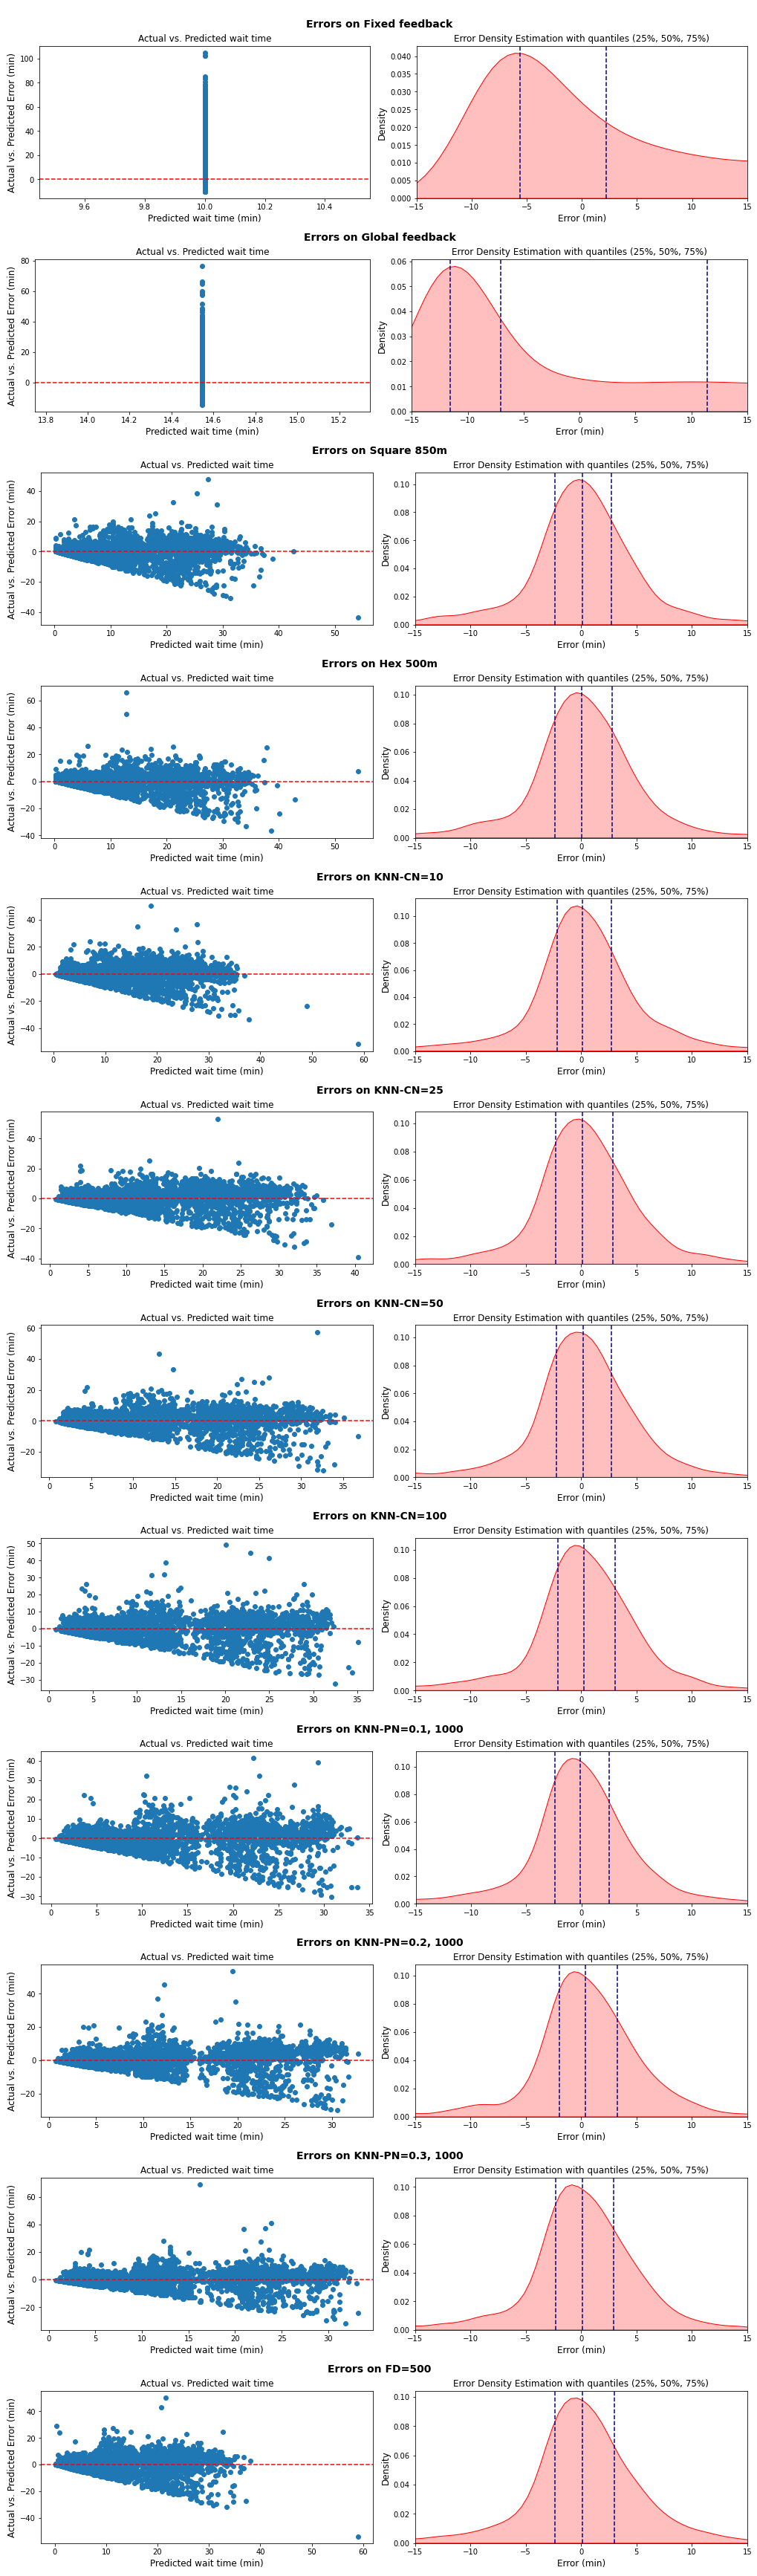

In [19]:
table_compare_methods = predictions_evaluations.plot_multiple_actual_vs_fitted(compare_methods, 'waitTime', kde_plot_limit=15, add_iteration_to_title=False)

count      mean        std        min        25%       50%  \
Fixed feedback     4394  9.646966  18.492964  -9.983333  -5.633333  2.200000   
Global feedback    3973  0.414634  14.895496 -14.530815 -11.580815 -7.047482   
Square 850m        4351 -0.026970   5.535876 -43.801389  -2.382151  0.091667   
Hex 500m           4305 -0.046867   5.748455 -36.657143  -2.361111  0.082639   
KNN-CN=10          4334  0.133340   7.376510 -29.110000  -2.297500  0.103333   
KNN-CN=25          4358  0.347649   5.731924 -32.156000  -2.106500  0.444667   
KNN-CN=50          4367  0.336436   5.641365 -32.504667  -2.078167  0.383667   
KNN-CN=100         4373  0.320537   5.777147 -31.014667  -2.140000  0.271833   
KNN-PN=0.1, 1000   4351  0.128673   5.653831 -30.062653  -2.202496  0.238333   
KNN-PN=0.2, 1000   4345 -0.231806   5.672163 -29.415276  -2.497796 -0.078178   
KNN-PN=0.3, 1000   4349  0.141990   5.531881 -29.837955  -2.239465  0.308523   
FD=500             4363 -0.023141   5.506221 -33.608333  -2.326590  0.087179   

                        75%        95%        99%         max  25% abs error  \
Fixed feedback    22.950000  44.450000  55.033833  104.816667       4.816667   
Global feedback   11.419185  29.122518  35.704518   76.335852       8.135852   
Square 850m        2.736271   8.271734  14.477507   47.850000       1.189595   
Hex 500m           2.795370   8.085739  14.708444   65.950000       1.189744   
KNN-CN=10          2.751250   8.194250  15.435250  310.943333       1.220417   
KNN-CN=25          3.178333   8.440467  14.322047   60.268667       1.262167   
KNN-CN=50          3.141000   8.466933  14.557780   56.899333       1.269333   
KNN-CN=100         3.082000   8.604700  15.114760   65.813667       1.273333   
KNN-PN=0.1, 1000   2.907211   7.862746  13.548597   79.847973       1.210698   
KNN-PN=0.2, 1000   2.716414   7.712005  12.896858   71.720413       1.274351   
KNN-PN=0.3, 1000   3.124873   8.079940  13.825834   47.822700       1.331553   
FD=500             2.697661   7.840885  13.609234   60.592667       1.217391   

                  50% abs error  75% abs error  95% abs error  99% abs error  \
Fixed feedback         8.433333      22.950000      44.450000      55.033833   
Global feedback       11.564148      14.264148      29.122518      35.704518   
Square 850m            2.543155       4.754522      12.260328      19.131589   
Hex 500m               2.564815       4.743103      11.935373      21.367670   
KNN-CN=10              2.502500       4.745833      12.383000      19.864150   
KNN-CN=25              2.580667       4.822833      11.896200      20.923453   
KNN-CN=50              2.549333       4.760667      11.614200      21.027880   
KNN-CN=100             2.517667       4.838333      12.478400      20.288527   
KNN-PN=0.1, 1000       2.547881       4.724896      11.419561      19.954425   
KNN-PN=0.2, 1000       2.593440       4.804797      11.654239      20.554143   
KNN-PN=0.3, 1000       2.660070       4.905283      11.531053      19.966700   
FD=500                 2.516667       4.670666      11.283778      19.917221   

                  std abs error         MSE       RMSE        MAE  \
Fixed feedback        14.628129  434.975813  20.856074  14.865855   
Global feedback        7.894317  221.991867  14.899391  12.636124   
Square 850m            4.056692   30.639603   5.535305   3.766013   
Hex 500m               4.282153   33.039259   5.747979   3.834374   
KNN-CN=10              6.282178   54.418125   7.376864   3.866829   
KNN-CN=25              4.250004   32.968271   5.741800   3.860795   
KNN-CN=50              4.178336   31.930900   5.650743   3.804262   
KNN-CN=100             4.296459   33.470536   5.785373   3.874400   
KNN-PN=0.1, 1000       4.224782   31.975019   5.654646   3.758489   
KNN-PN=0.2, 1000       4.193180   32.219762   5.676245   3.825834   
KNN-PN=0.3, 1000       3.967518   30.614830   5.533067   3.856634   
FD=500                 4.084777   30.312055   5.505638   3.691429  

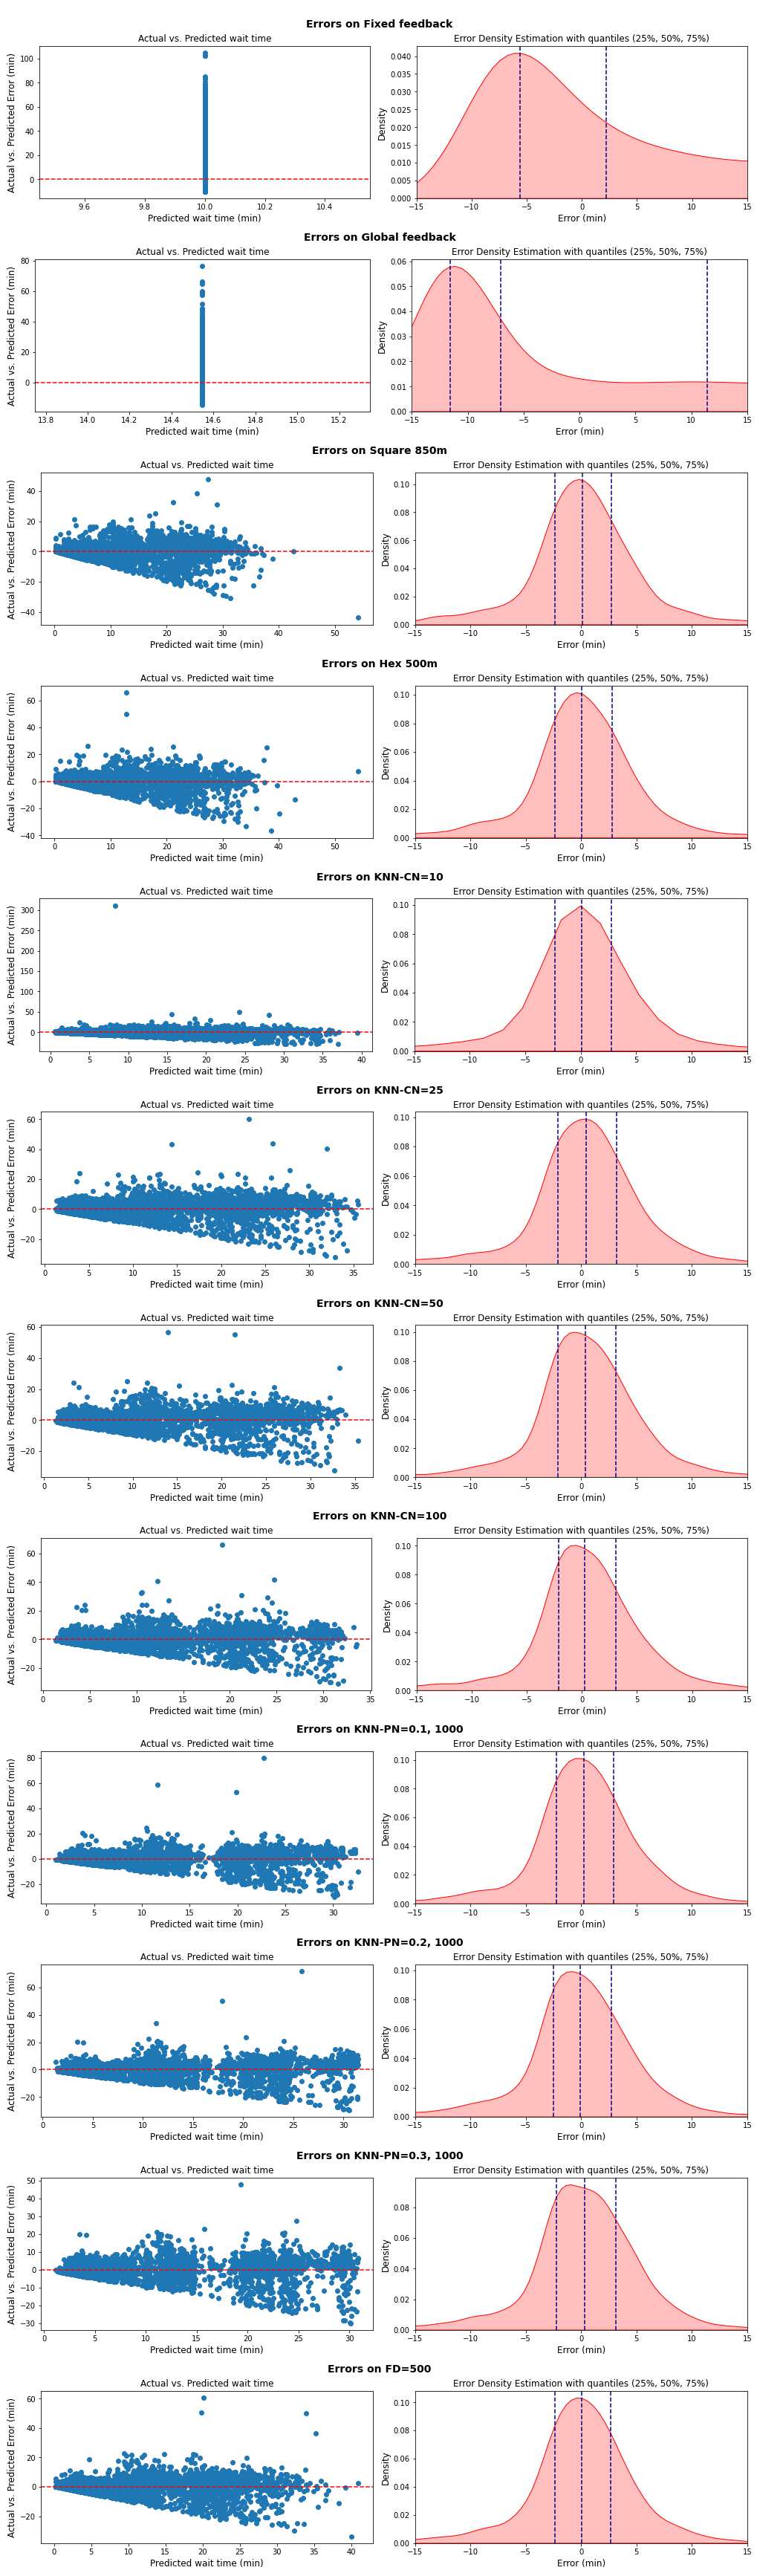

In [180]:
# without decay
table_compare_methods = predictions_evaluations.plot_multiple_actual_vs_fitted(compare_methods, 'waitTime', kde_plot_limit=15, add_iteration_to_title=False)

In [20]:
t = table_compare_methods.copy(deep=True)

In [21]:
t = t.drop(columns=['min', '25%', '50%', '75%', '95%', '99%', 'max', 'MSE'])

In [22]:
t

count      mean        std  25% abs error  50% abs error  \
Fixed feedback     4394  9.646966  18.492964       4.816667       8.433333   
Global feedback    3973  0.414634  14.895496       8.135852      11.564148   
Square 850m        4351 -0.026970   5.535876       1.189595       2.543155   
Hex 500m           4305 -0.046867   5.748455       1.189744       2.564815   
KNN-CN=10          4394  0.129839   5.575723       1.140137       2.430061   
KNN-CN=25          4345  0.101680   5.412223       1.198404       2.535388   
KNN-CN=50          4359  0.102407   5.456878       1.200458       2.474467   
KNN-CN=100         4374  0.209940   5.630700       1.203813       2.526391   
KNN-PN=0.1, 1000   4325 -0.112813   5.574899       1.179226       2.460748   
KNN-PN=0.2, 1000   4377  0.421085   5.699183       1.202183       2.526984   
KNN-PN=0.3, 1000   4345  0.065889   5.576044       1.263368       2.573415   
FD=500             4392  0.117910   5.829519       1.253705       2.613048   

                  75% abs error  95% abs error  99% abs error  std abs error  \
Fixed feedback        22.950000      44.450000      55.033833      14.628129   
Global feedback       14.264148      29.122518      35.704518       7.894317   
Square 850m            4.754522      12.260328      19.131589       4.056692   
Hex 500m               4.743103      11.935373      21.367670       4.282153   
KNN-CN=10              4.578595      11.846757      19.103078       4.155136   
KNN-CN=25              4.626955      11.510270      19.014077       3.957187   
KNN-CN=50              4.603064      11.279166      19.600672       4.042913   
KNN-CN=100             4.697509      11.639496      20.859789       4.177326   
KNN-PN=0.1, 1000       4.572835      12.033679      20.885749       4.144656   
KNN-PN=0.2, 1000       4.840236      11.722371      21.197708       4.234582   
KNN-PN=0.3, 1000       4.788632      11.610911      19.815901       4.099808   
FD=500                 5.057676      12.307184      20.912353       4.288022   

                       RMSE        MAE  % errors < 0 (overestimated)  
Fixed feedback    20.856074  14.865855                     45.152481  
Global feedback   14.899391  12.636124                     61.565568  
Square 850m        5.535305   3.766013                     48.494599  
Hex 500m           5.747979   3.834374                     48.408827  
KNN-CN=10          5.576601   3.719317                     48.793810  
KNN-CN=25          5.412555   3.692753                     48.423475  
KNN-CN=50          5.457213   3.665518                     48.382657  
KNN-CN=100         5.633969   3.780417                     47.393690  
KNN-PN=0.1, 1000   5.575396   3.729191                     51.283237  
KNN-PN=0.2, 1000   5.714068   3.836520                     46.378798  
KNN-PN=0.3, 1000   5.575792   3.779025                     48.837745  
FD=500             5.830047   3.949977                     48.929872

In [23]:
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods}
\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  count &  mean &    std &  25\% abs error &  50\% abs error &  75\% abs error &  95\% abs error &  99\% abs error &  std abs error &   RMSE &    MAE &  \% errors < 0 (overestimated) \\
\midrule
\textbf{Fixed feedback  } &   4394 &  9.65 &  18.49 &           4.82 &           8.43 &          22.95 &          44.45 &          55.03 &          14.63 &  20.86 &  14.87 &                         45.15 \\
\textbf{Global feedback } &   3973 &  0.41 &  14.90 &           8.14 &          11.56 &          14.26 &          29.12 &          35.70 &           7.89 &  14.90 &  12.64 &                         61.57 \\
\textbf{Square 850m     } &   4351 & -0.03 &   5.54 &           1.19 &           2.54 &           4.75 &          12.26 &          19.13 &           4.06 &   5.54 &   3.77 &                         48.49 \\
\textbf{Hex 500m        } &   4305 & -0.05 &   5.75 &           1.19 &      

In [35]:
compare_methods_2 = [
    ("Fixed", data_no_rej['fixed'], last_iter),
    ("Global", data_no_rej['global']['markov'], last_iter),
    ("Square 850m", data_no_rej['square_850']['markov'], last_iter),
    ("Hex 500m", data_no_rej['hex_500']['markov'], last_iter),
    ("KNN-CN 10", data_no_rej['dynamic_CN']['markov'][10], last_iter),
    ("KNN-CN 25", data_no_rej['dynamic_CN']['markov'][25], last_iter),
    ("KNN-CN 50", data_no_rej['dynamic_CN']['markov'][50], last_iter),
    ("KNN-CN 100", data_no_rej['dynamic_CN']['markov'][100], last_iter),
    ("KNN-PN 0.1", data_no_rej['dynamic_PN']['markov'][0.1], last_iter),
    ("KNN-PN 0.2", data_no_rej['dynamic_PN']['markov'][0.2], last_iter),
    ("KNN-PN 0.3", data_no_rej['dynamic_PN']['markov'][0.3], last_iter),
    ("FD 500m", data_no_rej['dynamic_FD']['markov'][500], last_iter)
]

In [36]:
importlib.reload(predictions_evaluations)

<module 'predictions_evaluations' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/predictions_evaluations.py'>

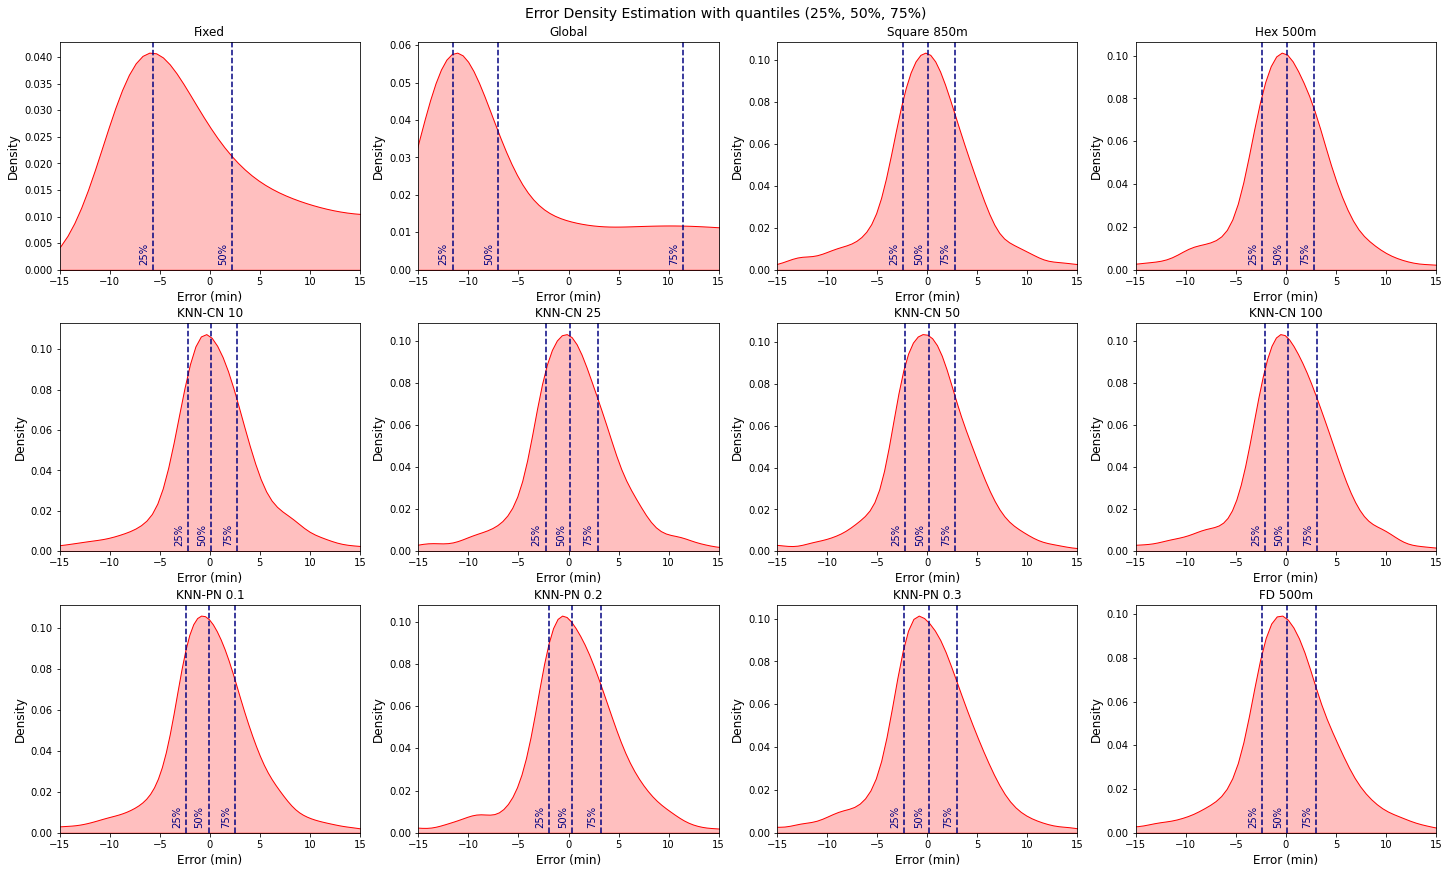

In [38]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(compare_methods_2, 'waitTime', 3,4, kde_plot_limit=15, add_iteration_to_title=False, filename='/cluster/home/mfrancesc/IVT/paper_figures/idf_kde_errors.pdf')

In [160]:
importlib.reload(predictions_evaluations)


<module 'predictions_evaluations' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/predictions_evaluations.py'>

In [24]:
t = predictions_evaluations.get_confidence_intervals_table(compare_methods, 'waitTime', add_iteration_to_title=False)

In [25]:
t

% trips with abs error < 2.5  % trips with abs error < 5  \
Fixed feedback                       12.380519                   26.240328   
Global feedback                       6.418324                   12.534609   
Square 850m                          49.161112                   76.809929   
Hex 500m                             48.617886                   76.562137   
KNN-CN=10                            51.365498                   77.583068   
KNN-CN=25                            49.344074                   77.077100   
KNN-CN=50                            50.378527                   77.540720   
KNN-CN=100                           49.542753                   77.000457   
KNN-PN=0.1, 1000                     50.843931                   77.479769   
KNN-PN=0.2, 1000                     49.303176                   75.965273   
KNN-PN=0.3, 1000                     48.814730                   76.363636   
FD=500                               48.224044                   74.316940   

                  % trips with abs error < 7.5  % trips with abs error < 10  
Fixed feedback                       43.149750                    61.401912  
Global feedback                      21.797131                    37.452806  
Square 850m                          86.807630                    92.392553  
Hex 500m                             86.875726                    92.845528  
KNN-CN=10                            86.868457                    92.467000  
KNN-CN=25                            88.377445                    93.003452  
KNN-CN=50                            88.873595                    93.622390  
KNN-CN=100                           87.357110                    92.912666  
KNN-PN=0.1, 1000                     87.815029                    92.693642  
KNN-PN=0.2, 1000                     86.543294                    92.643363  
KNN-PN=0.3, 1000                     87.710012                    93.187572  
FD=500                               85.951730                    91.894353

In [27]:
print(t.round(2).to_latex(bold_rows=True, label='tab:compare_methods_percentages',caption=''))

\begin{table}
\centering
\caption{}
\label{tab:compare_methods_percentages}
\begin{tabular}{lrrrr}
\toprule
{} &  \% trips with abs error < 2.5 &  \% trips with abs error < 5 &  \% trips with abs error < 7.5 &  \% trips with abs error < 10 \\
\midrule
\textbf{Fixed feedback  } &                         12.38 &                       26.24 &                         43.15 &                        61.40 \\
\textbf{Global feedback } &                          6.42 &                       12.53 &                         21.80 &                        37.45 \\
\textbf{Square 850m     } &                         49.16 &                       76.81 &                         86.81 &                        92.39 \\
\textbf{Hex 500m        } &                         48.62 &                       76.56 &                         86.88 &                        92.85 \\
\textbf{KNN-CN=10       } &                         51.37 &                       77.58 &                         86.87 &           

In [59]:
compare_smoothening = [
    ("Hex 500m markov", data_no_rej['hex_500']['markov'], last_iter),
    ("Hex 500m MSA = 0.2", data_no_rej['hex_500']['msa02'], last_iter),
    ("Hex 500m MW = 5", data_no_rej['hex_500']['mw5'], last_iter)
]

count      mean       std        min  \
title                                                                       
Hex 500m markov on iteration 60     4305.0 -0.046867  5.748455 -36.657143   
Hex 500m MSA = 0.2 on iteration 60  4320.0 -0.169861  5.434978 -31.065829   
Hex 500m MW = 5 on iteration 60     4352.0 -0.105361  5.447941 -33.808879   

                                         25%       50%       75%       95%  \
title                                                                        
Hex 500m markov on iteration 60    -2.361111  0.082639  2.795370  8.085739   
Hex 500m MSA = 0.2 on iteration 60 -2.417706 -0.083885  2.474624  7.506921   
Hex 500m MW = 5 on iteration 60    -2.338122  0.062039  2.684478  7.658807   

                                          99%        max        MSE      RMSE  \
title                                                                           
Hex 500m markov on iteration 60     14.708444  65.950000  33.039259  5.747979   
Hex 500m MSA = 0.2 on iteration 60  13.887229  51.051101  29.561004  5.437003   
Hex 500m MW = 5 on iteration 60     13.076580  38.265000  29.684345  5.448334   

                                         MAE  % errors < 0  
title                                                       
Hex 500m markov on iteration 60     3.834374     48.408827  
Hex 500m MSA = 0.2 on iteration 60  3.641527     50.763889  
Hex 500m MW = 5 on iteration 60     3.697261     49.080882

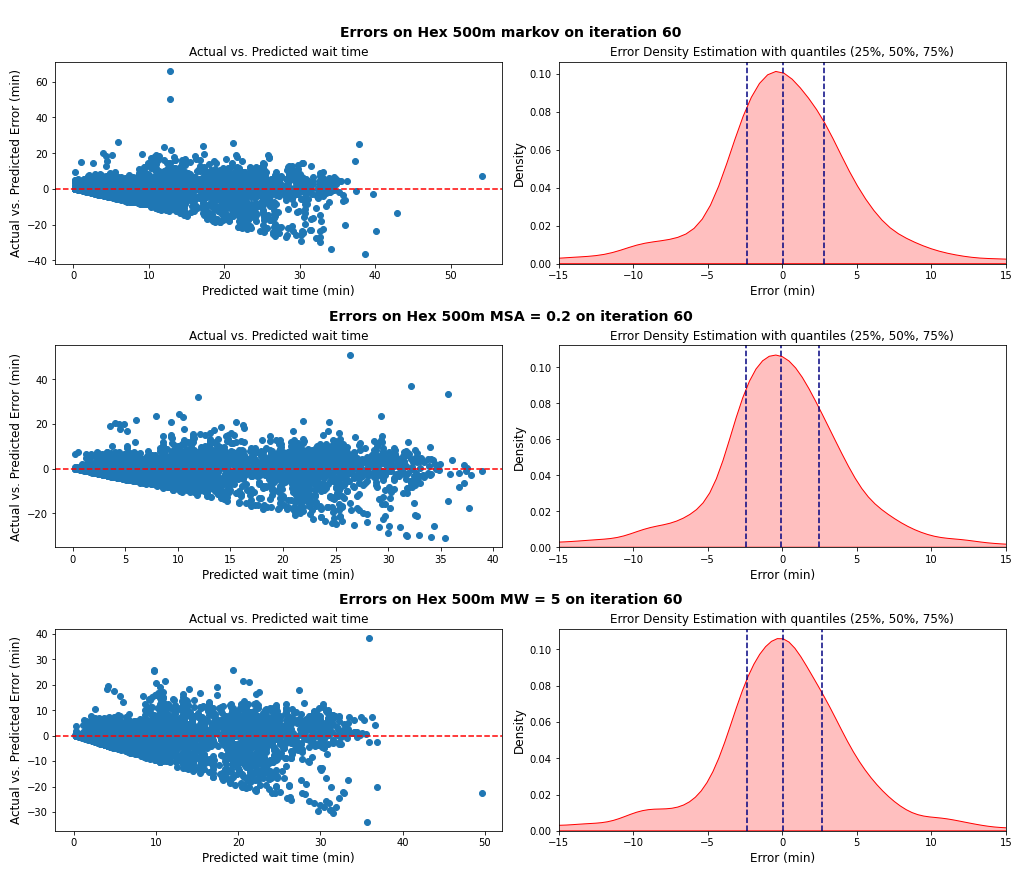

In [60]:
_ = predictions_evaluations.plot_multiple_actual_vs_fitted(compare_smoothening, 'waitTime', kde_plot_limit=15)

In [23]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ("Hex 500 markov", no_rej_data_hex_500['markov'], c_gradient[0], '-'),
    ("Hex 500 MSA = 0.2", no_rej_data_hex_500['msa02'], c_gradient[1], '--'),
    ("Hex 500 MW = 5", no_rej_data_hex_500['mw5'], c_gradient[2], ':')
]


In [148]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color_square = [
    ("Square 850 markov", data_no_rej['square_850']['markov'], c_gradient[0], '-'),
    ("Square 850 MSA = 0.2", data_no_rej['square_850']['msa02'], c_gradient[1], '--'),
    ("Square 850 MW = 5", data_no_rej['square_850']['mw5'], c_gradient[2], ':')
]

In [151]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color_dynamic = [
    ("Dynamic 25 markov", data_no_rej['dynamic_CN']['markov'][25], c_gradient[0], '-'),
    ("Dyanmic 25 MSA = 0.2", data_no_rej['dynamic_CN']['msa02'][25], c_gradient[1], '--'),
    ("Dynamic 25 MW = 5", data_no_rej['dynamic_CN']['mw5'][25], c_gradient[2], ':')
]

In [218]:
plot_list_color_global = [
    ("Global markov", data_no_rej['global']['markov'], c_gradient[0], '-'),
    ("Global MSA = 0.2", data_no_rej['global']['msa02'], c_gradient[1], '--'),
    ("Global MW = 5", data_no_rej['global']['mw5'], c_gradient[2], ':')
]

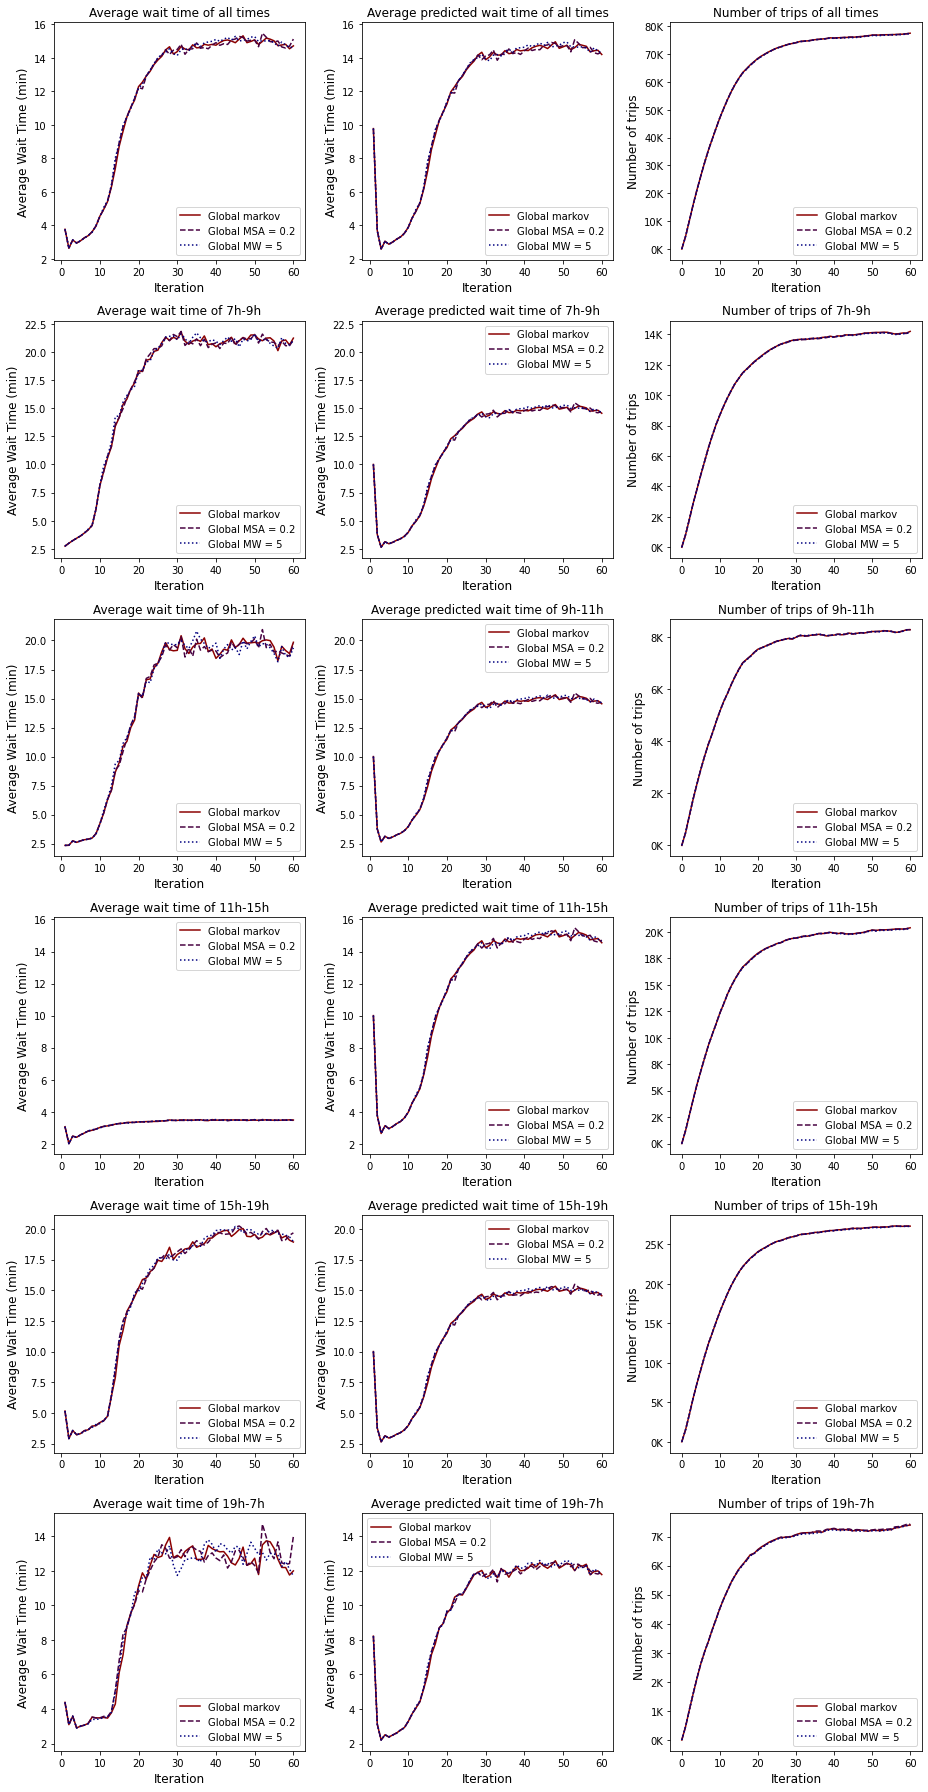

In [219]:

predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color_global)

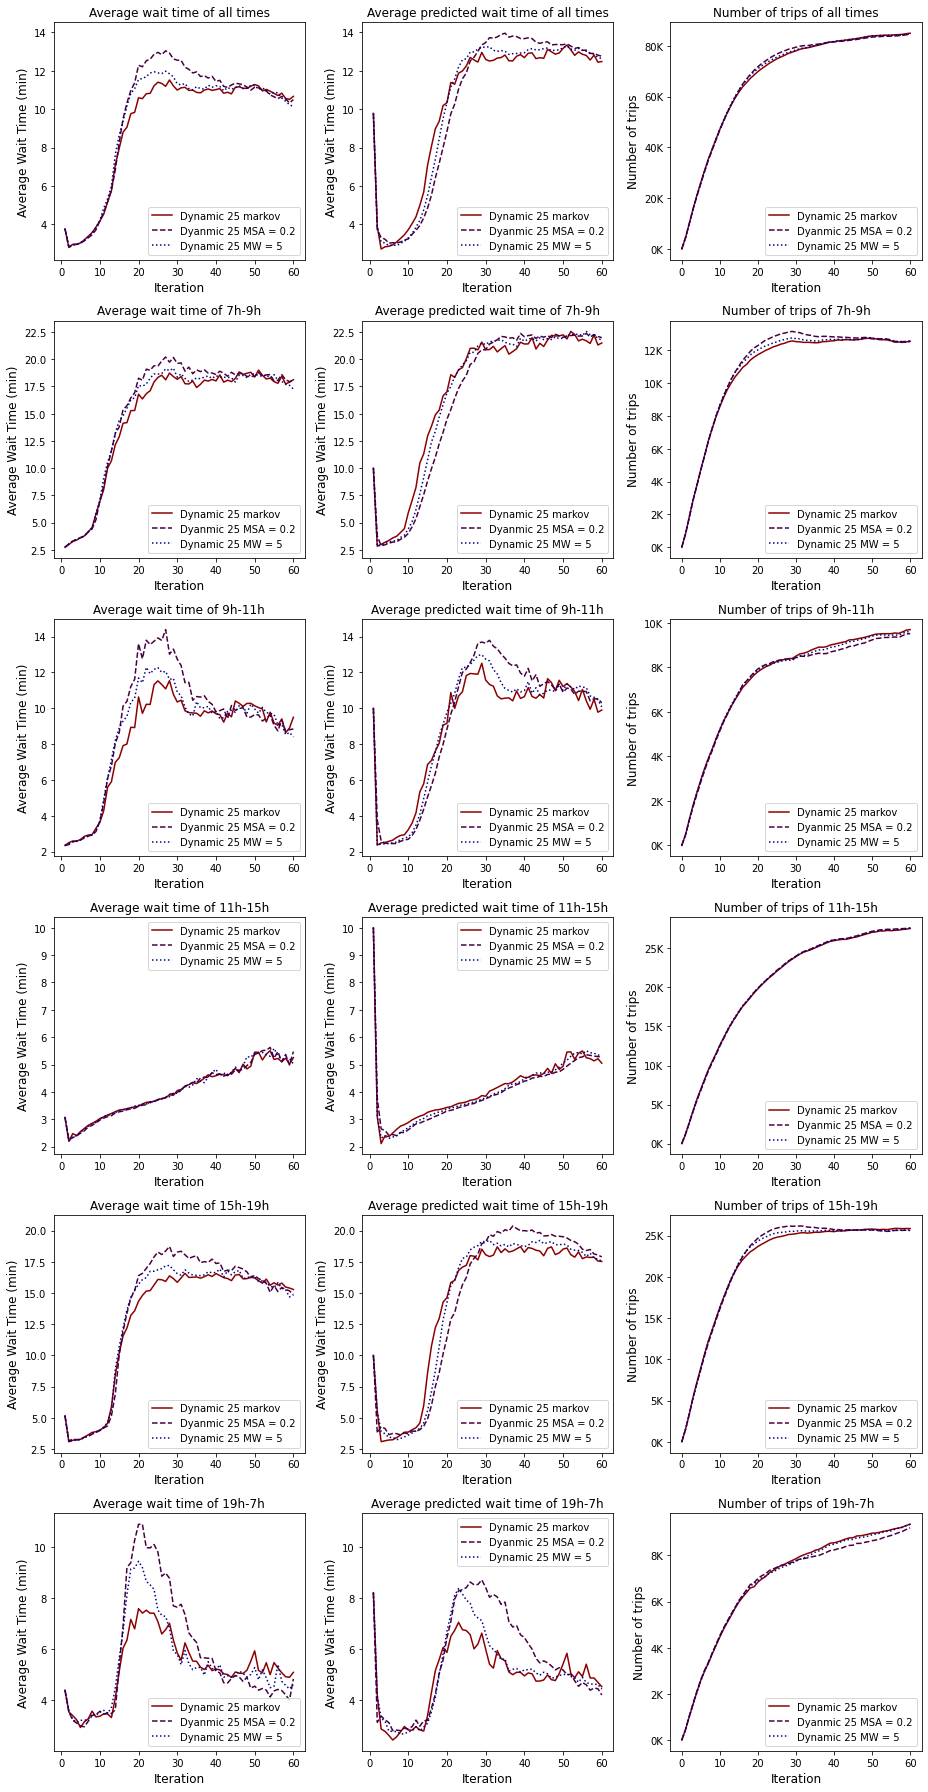

In [152]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color_dynamic)

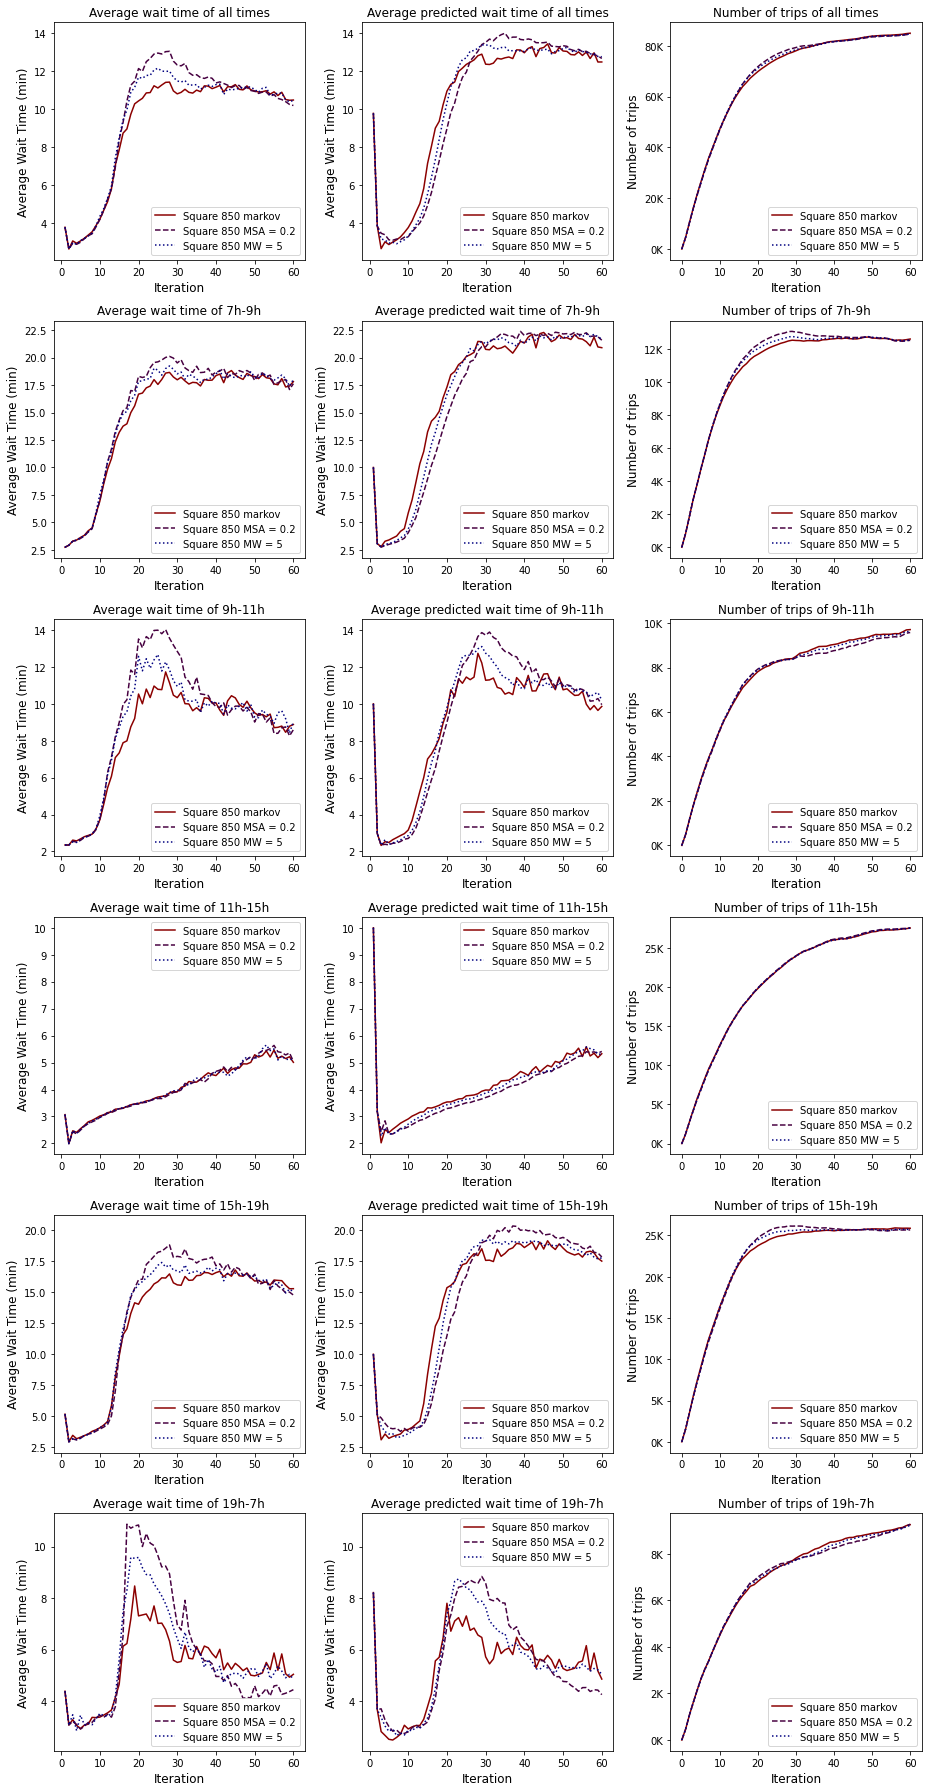

In [149]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color_square)

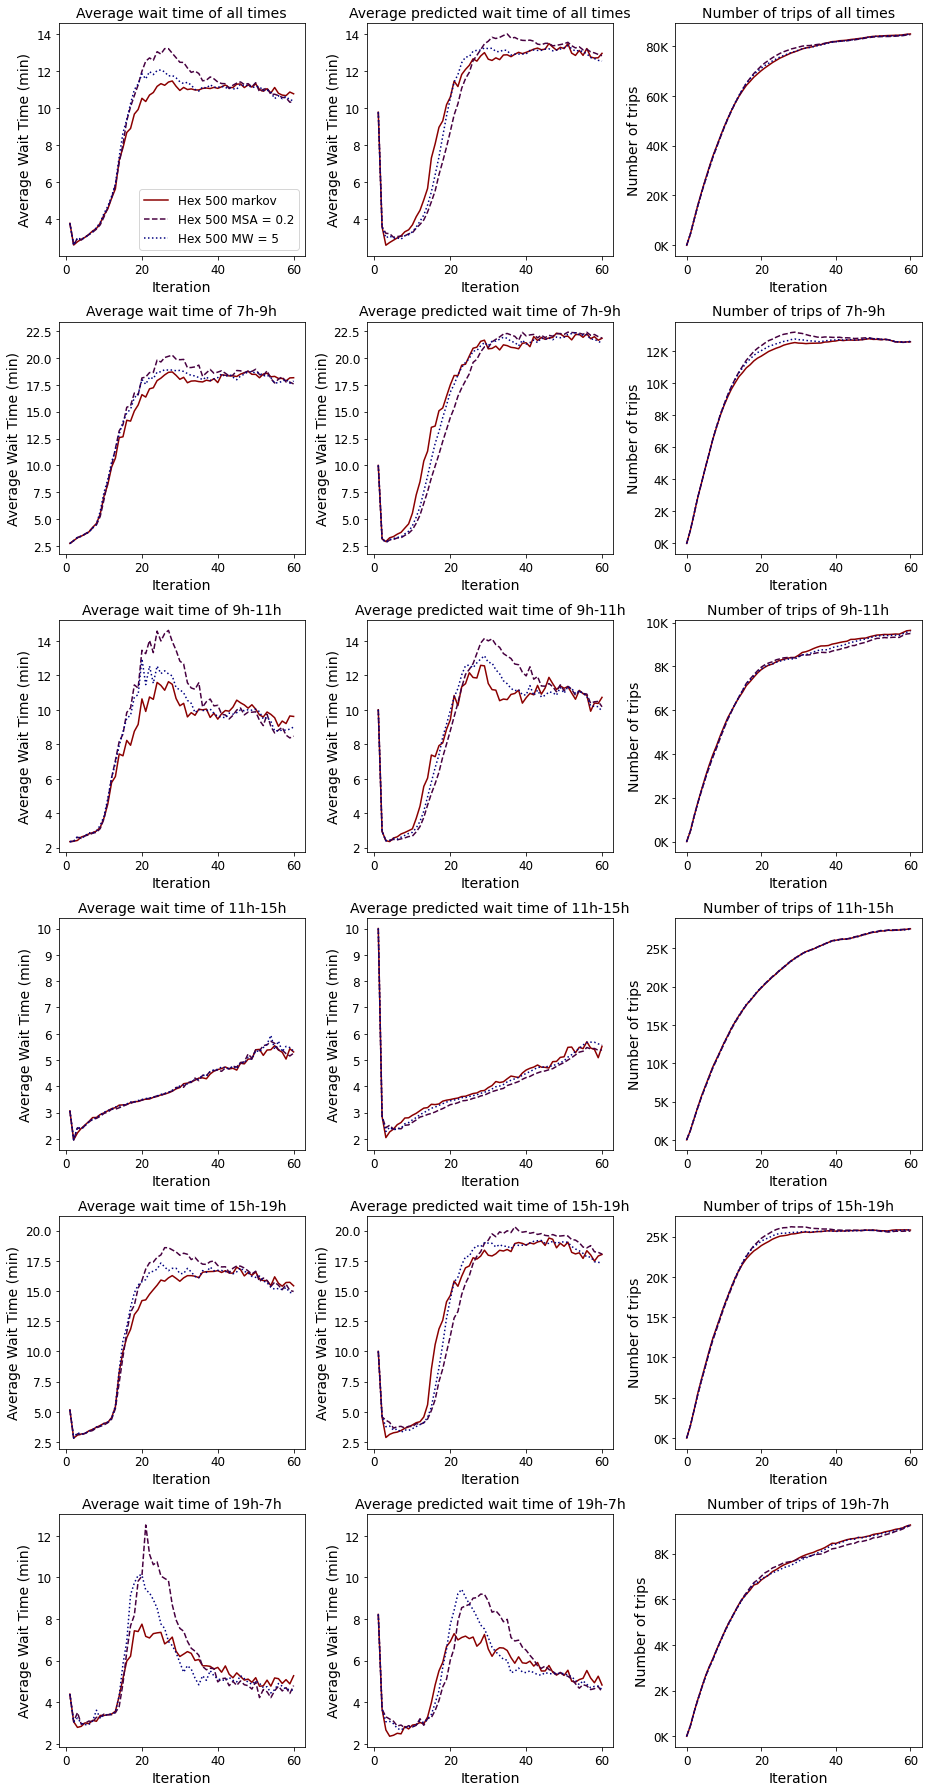

In [26]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color,  save=True, filename='/cluster/home/mfrancesc/IVT/paper_figures/idf_smoothing.pdf')

In [10]:
importlib.reload(plotting_utils)

<module 'plotting_utils' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/plotting_utils.py'>

In [9]:
start_time = 6
end_time = 24
bin_duration_min = 30
min_distance = 0
max_distance = 10000
bin_distance_m = 1000

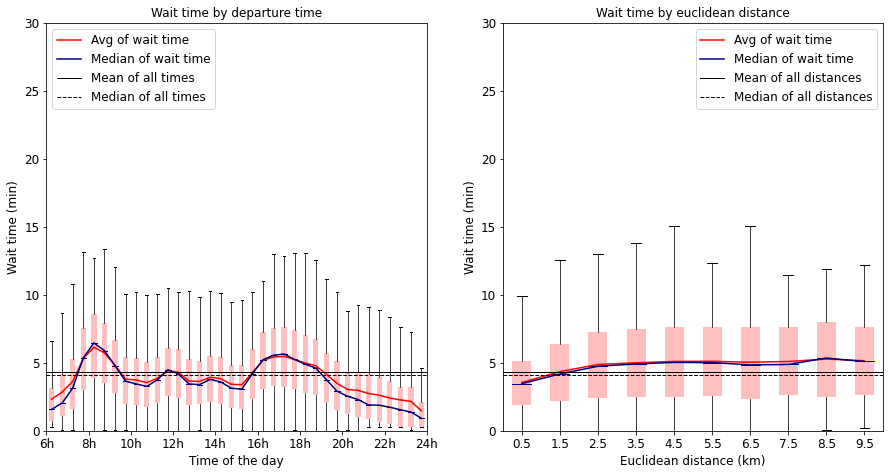

In [40]:
plotting_utils.plot_waiting_time(data_with_rej['dynamic_CN']['markov'][10],
                start_time, end_time, bin_duration_min,
                min_distance, max_distance, bin_distance_m, iteration=-1, 
                filter_router_zeros=False, add_boxplots=True, ylim=30)

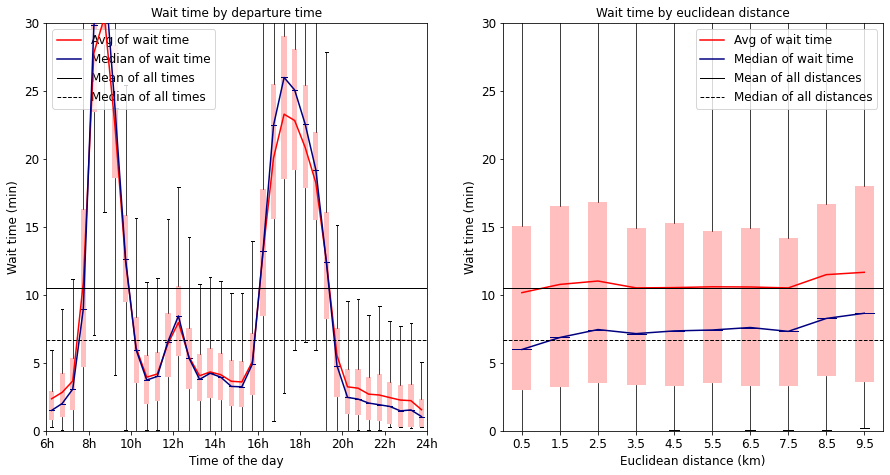

In [41]:
plotting_utils.plot_waiting_time(data_no_rej['dynamic_CN']['markov'][10],
                start_time, end_time, bin_duration_min,
                min_distance, max_distance, bin_distance_m, iteration=-1, 
                filter_router_zeros=False, add_boxplots=True, ylim=30)

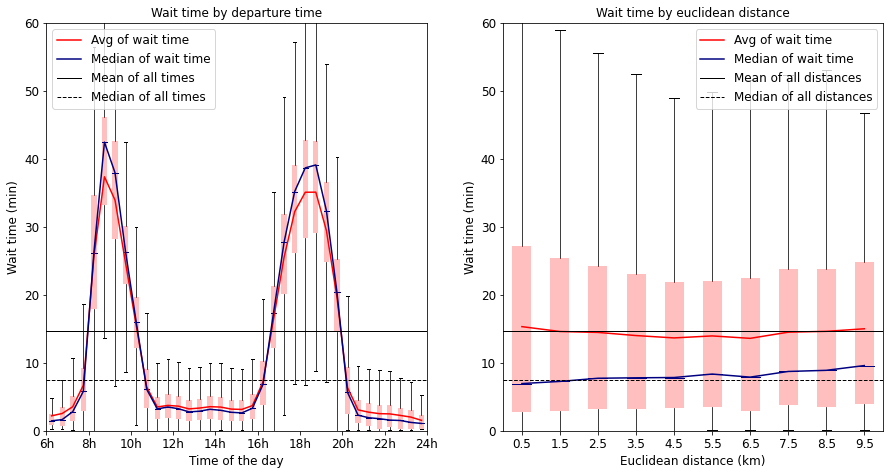

In [71]:
plotting_utils.plot_waiting_time(data_no_rej['global']['markov'],
                start_time, end_time, bin_duration_min,
                min_distance, max_distance, bin_distance_m, iteration=-1, 
                filter_router_zeros=False, add_boxplots=True, ylim=60)

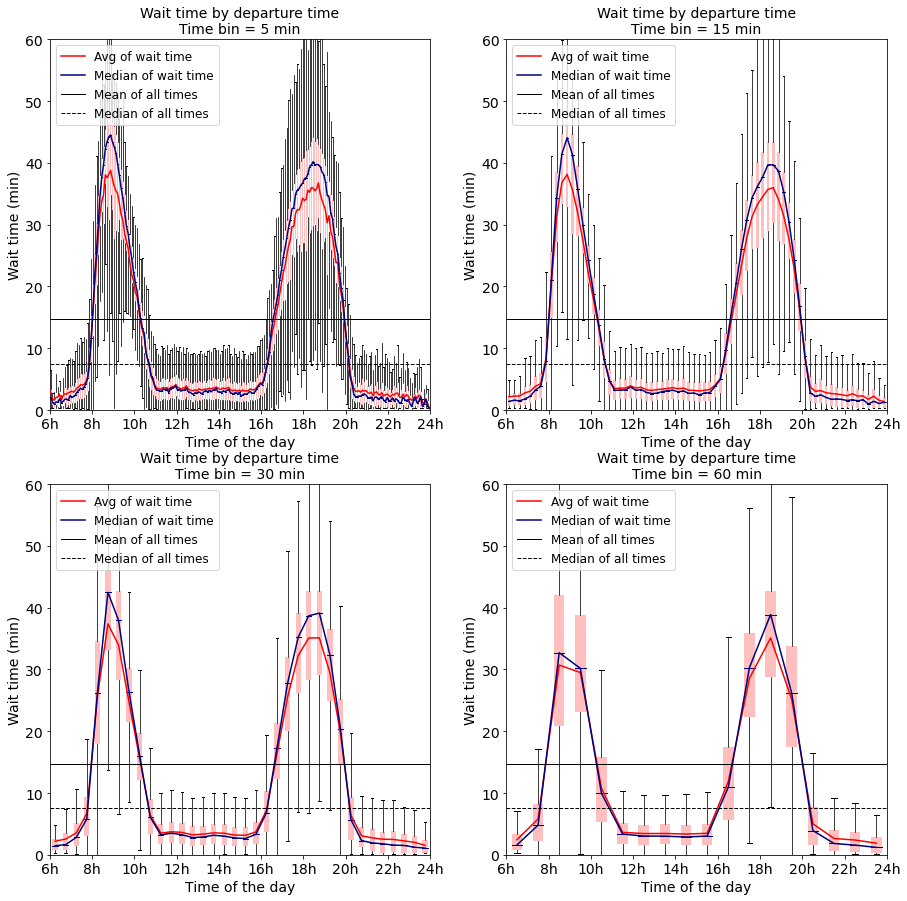

In [19]:
bin_durations_min = [5,15,30,60]

plotting_utils.plot_waiting_time_multiple_time_bins(
    no_rej_data_global['markov'], start_time, end_time, bin_durations_min, iteration=-1,
    filter_router_zeros=False, add_boxplots=True, ylim=60, save=True,
    filename='/cluster/home/mfrancesc/IVT/paper_figures/idf_waitTime_multipleTime.pdf')

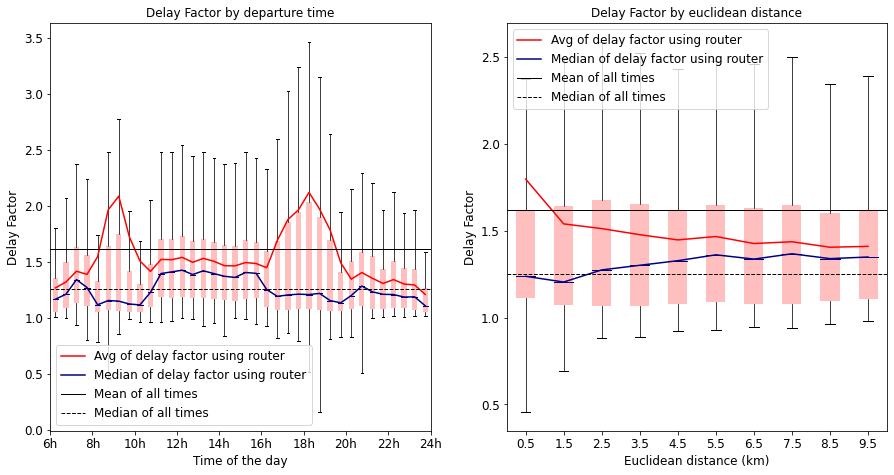

In [77]:
plotting_utils.plot_delay_factor(data_no_rej['global']['markov'], start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=-1, 
                plot_estimated=False, plot_using_sum=False, filter_router_zeros=False,
                                add_boxplots=True)

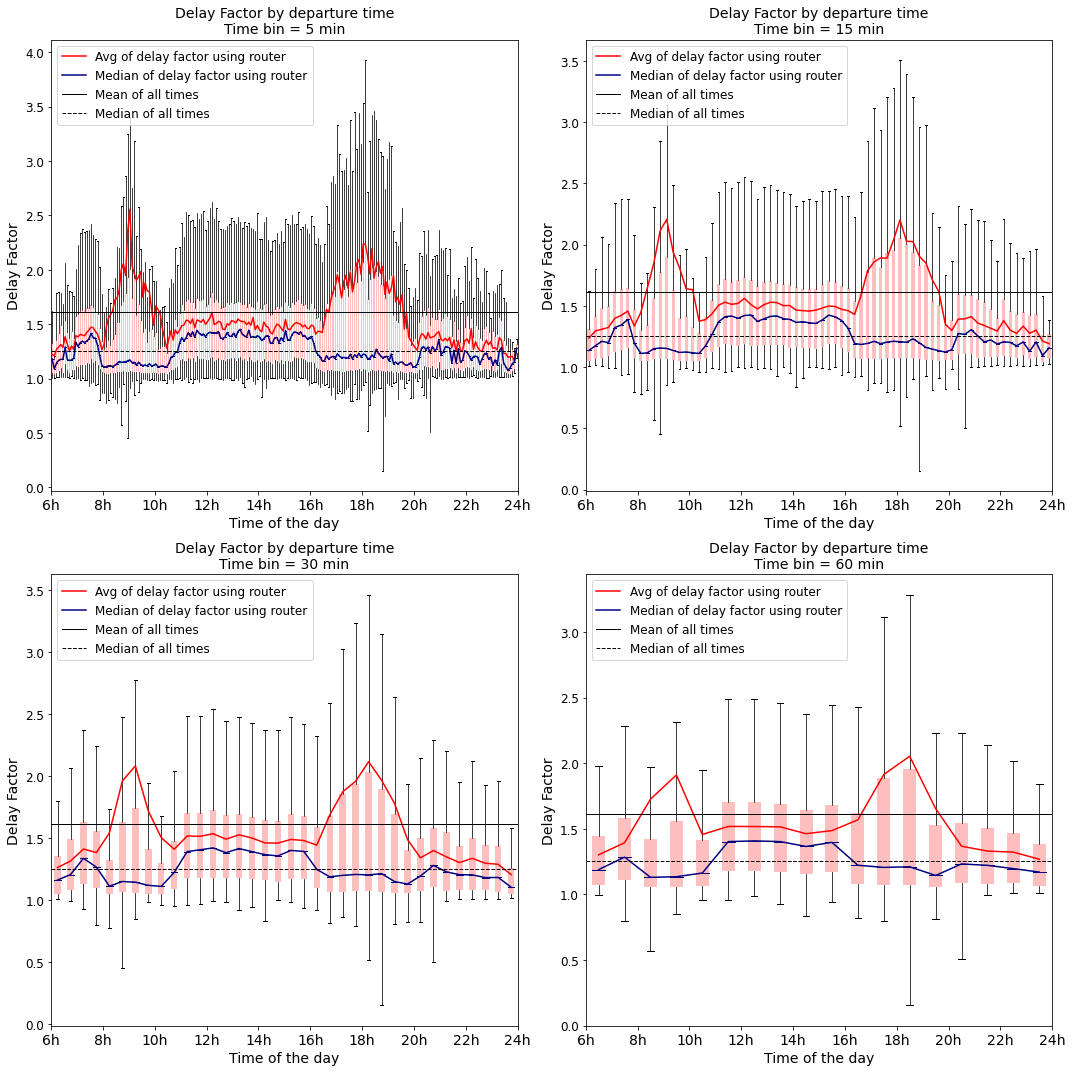

In [18]:
bin_durations_min = [5,15,30,60]
plotting_utils.plot_df_multiple_time_bins(
    no_rej_data_global['markov'], start_time, end_time, bin_durations_min, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False, add_boxplots=True, save=True,
    filename='/cluster/home/mfrancesc/IVT/paper_figures/idf_delayFactor_multipleTime.pdf')

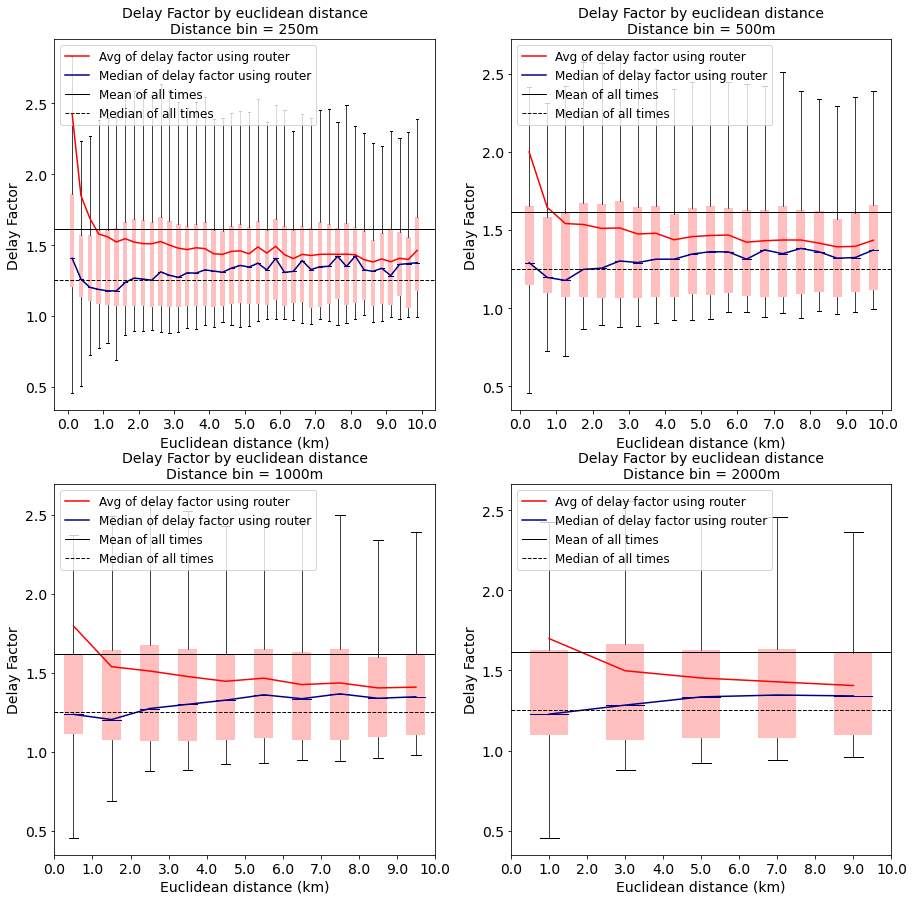

In [16]:
bin_distances_m = [250, 500, 1000, 2000]
plotting_utils.plot_df_multiple_distance_bins(
    no_rej_data_global['markov'], min_distance, max_distance, bin_distances_m, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False, add_boxplots=True, save=True,
    filename='/cluster/home/mfrancesc/IVT/paper_figures/idf_delayFactor_multipleDistance.pdf')

In [82]:
data_no_rej['hex_500'].keys()

dict_keys(['drt_legs', 'global_stats', 'drt_trips_stats', 'drt_predictions', 'binned_wait_time', 'binned_delay_factor', 'link2zones', 'fixedZones', 'stopwatch'])

  0%|          | 0/7 [00:00<?, ?it/s]

Imputing 1085  zones onto 77530  points by spatial join...


100%|██████████| 7/7 [00:00<00:00, 13.55it/s]


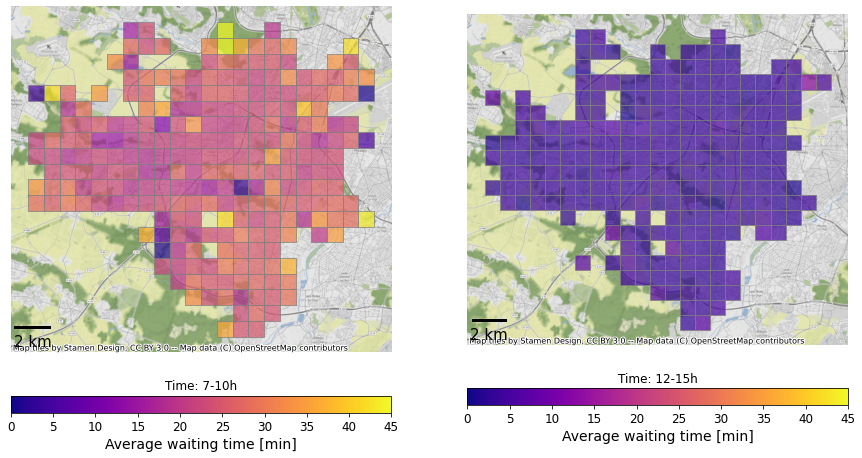

In [8]:
it_drt_trips_stats = no_rej_data_global['markov']['drt_trips_stats'][last_iter].copy(deep=True)
zones = no_rej_data_square_850['markov']['fixedZones'].copy(deep=True)
zones.crs = 'EPSG:2154'
zones_id = 'zoneId'
idf_plotting.plot_average_waitTime_per_timeBins_custom(it_drt_trips_stats, zones, zones_id, vmin=0, vmax=45)

count      mean       std        min  \
title                                                                          
Hex 500 markov rej on iteration 60     4310.0 -0.019652  2.525835  -9.116667   
Hex 500 markov no rej on iteration 60  4305.0 -0.046867  5.748455 -36.657143   
CN=10 markov rej on iteration 60       4340.0  0.026735  2.485343  -7.853333   
CN=10 markov no rej on iteration 60    4334.0  0.133340  7.376510 -29.110000   
CN=25 markov rej on iteration 60       4329.0 -0.030495  2.378807  -7.144667   
CN=25 markov no rej on iteration 60    4358.0  0.347649  5.731924 -32.156000   

                                            25%       50%       75%       95%  \
title                                                                           
Hex 500 markov rej on iteration 60    -1.848915 -0.123652  1.746167  4.063093   
Hex 500 markov no rej on iteration 60 -2.361111  0.082639  2.795370  8.085739   
CN=10 markov rej on iteration 60      -1.800000 -0.083333  1.761667  4.268583   
CN=10 markov no rej on iteration 60   -2.297500  0.103333  2.751250  8.194250   
CN=25 markov rej on iteration 60      -1.820667 -0.071333  1.667333  4.002400   
CN=25 markov no rej on iteration 60   -2.106500  0.444667  3.178333  8.440467   

                                             99%         max        MSE  \
title                                                                     
Hex 500 markov rej on iteration 60      5.779590   22.017754   6.378748   
Hex 500 markov no rej on iteration 60  14.708444   65.950000  33.039259   
CN=10 markov rej on iteration 60        5.859517   12.225000   6.176223   
CN=10 markov no rej on iteration 60    15.435250  310.943333  54.418125   
CN=25 markov rej on iteration 60        5.293707    7.788000   5.658344   
CN=25 markov no rej on iteration 60    14.322047   60.268667  32.968271   

                                           RMSE       MAE  % errors < 0  
title                                                                    
Hex 500 markov rej on iteration 60     2.525618  2.028429     51.531323  
Hex 500 markov no rej on iteration 60  5.747979  3.834374     48.408827  
CN=10 markov rej on iteration 60       2.485201  2.020435     51.129032  
CN=10 markov no rej on iteration 60    7.376864  3.866829     48.846331  
CN=25 markov rej on iteration 60       2.378727  1.951908     51.074151  
CN=25 markov no rej on iteration 60    5.741800  3.860795     44.814135

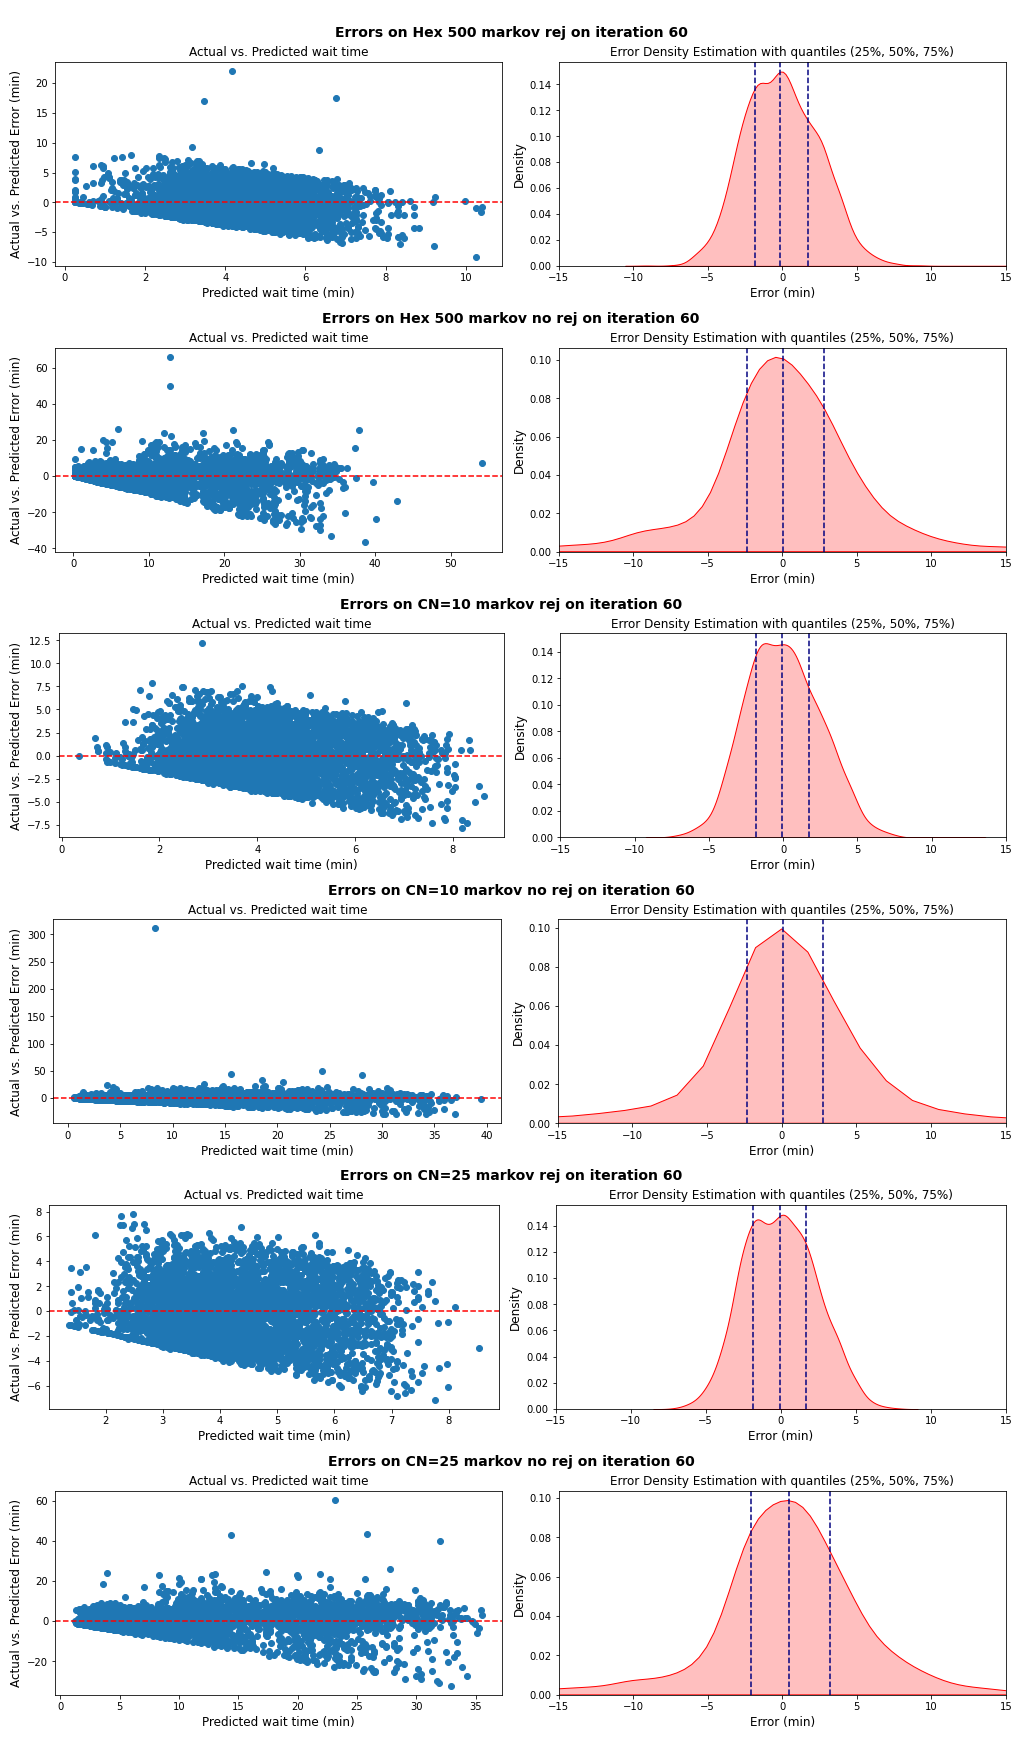

In [57]:
_ = predictions_evaluations.plot_multiple_actual_vs_fitted(compare_rej, 'waitTime', kde_plot_limit=15)

In [69]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ("Hex 500 markov rej", data_with_rej['hex_500']['markov'], c_gradient[0], '-'),
    ("Hex 500 markov no rej", data_no_rej['hex_500'], c_gradient[1], '--'),
    ("Global markov no rej", data_no_rej['global']['markov'], c_gradient[2], ':')
]


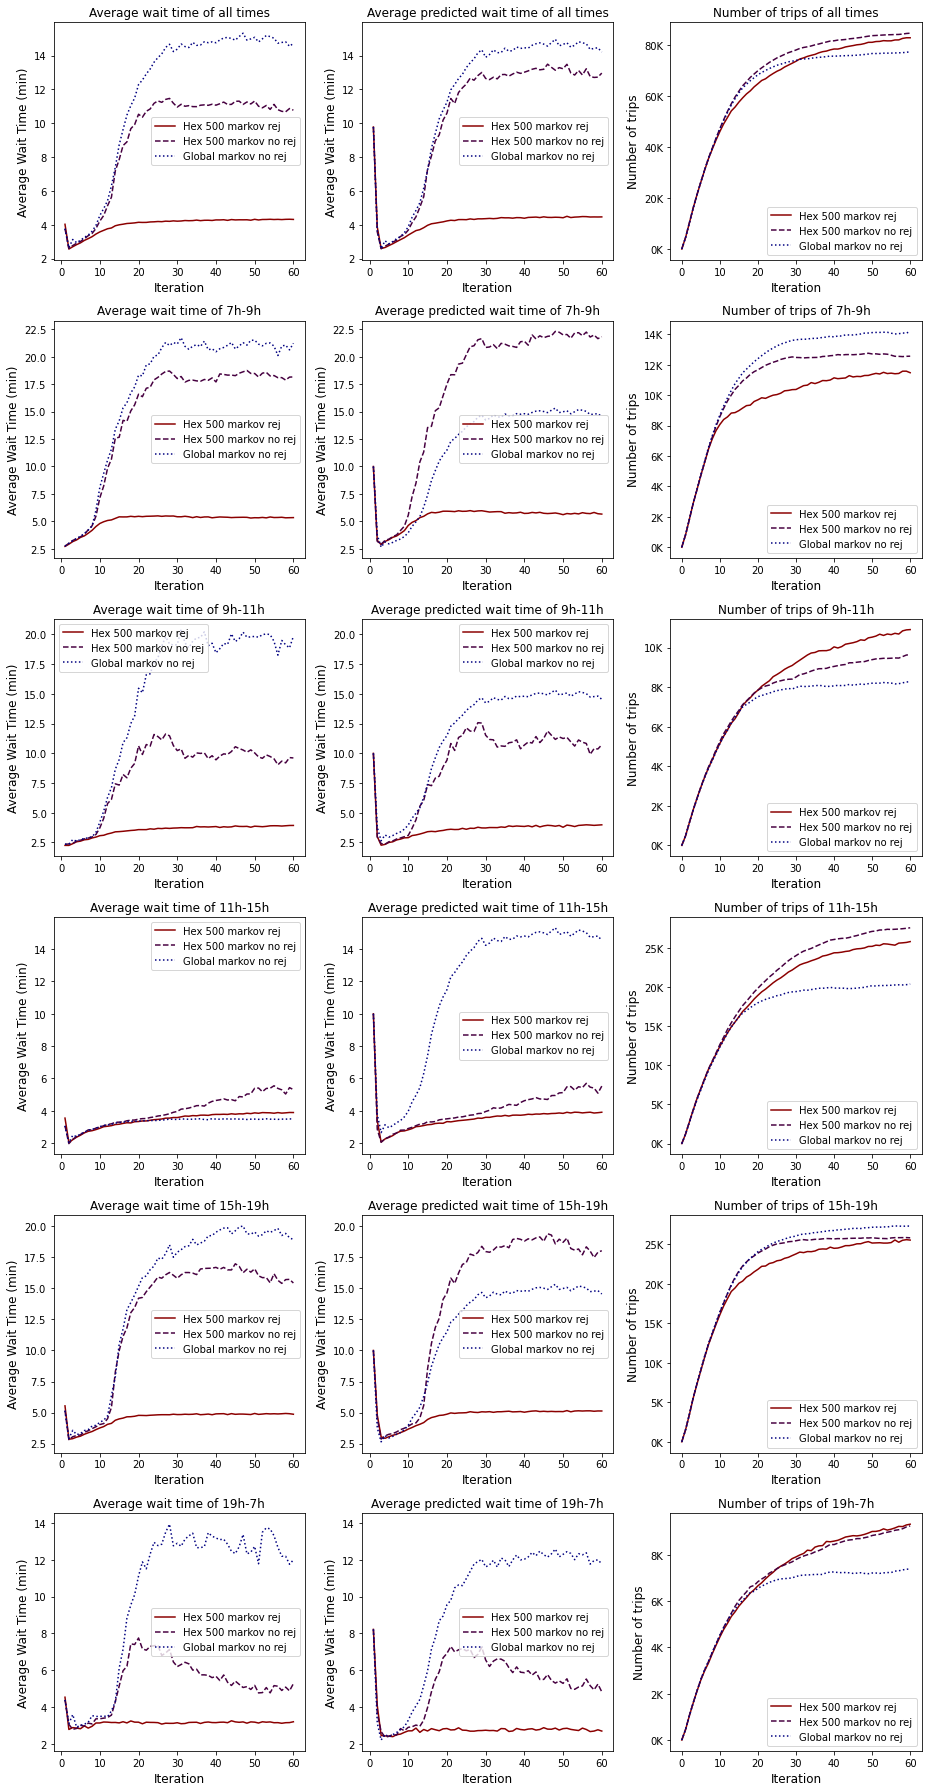

In [70]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color)